In [1]:
%matplotlib inline
import sys
sys.path.append("/home/bianyuan/workspace/Grab_TNGgalaxy/")
# sys.path.append("./Grab_TNGgalaxy")
import illustris_python as il
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
%matplotlib widget
run = 'TNG50'
basePath = '/media/bianyuan/data-TNG-1/' + run + '-1/output'
from astroML.plotting import setup_text_plots
#Lets text in plots use latex
setup_text_plots(usetex=True)

/home/bianyuan/.conda/envs/py310/lib/python3.10/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [2]:
'''Tranfer SnapNum to Redshift'''

import numpy as np
import h5py, scipy
from pynbody import units as units_conv

Redshift_snapshot = np.loadtxt('/home/bianyuan/workspace/data/Redshift_snapshot.txt',comments='Snapshot')

def redshift_snapshot(snapshots, datafile='/home/bianyuan/workspace/data/Redshift_snapshot.txt', return_opt=None):
    snapshots0, redshifts0 = np.loadtxt(datafile, skiprows=1, unpack=True, usecols=[0, 2])
    n_snap = np.size(snapshots)
    if n_snap == 1: 
        redshifts = redshifts0[np.where(snapshots0 == snapshots)][0]
    elif n_snap >1:
        redshifts = np.zeros(n_snap)
        for ii in range(n_snap): 
            if  snapshots[ii] is np.nan: 
                redshifts[ii] = np.nan
            else:
                redshifts[ii] = redshifts0[np.where(snapshots0 == snapshots[ii])][0]
    if return_opt is None: 
        return redshifts
#   elif return_opt == 'age':
#       return age(redshifts)
    elif return_opt == 'FT':
        return FT(redshifts)

def _a_dot(a, h0, om_m, om_l):                                
    om_k = 1.0 - om_m - om_l      
    return h0 * a * np.sqrt(om_m * (a ** -3) + om_k * (a ** -2) + om_l)  

def _a_dot_recip(*args):
    return 1. / _a_dot(*args) 

# The formation time of stars in unit of Gyr
def FT(redshift, h0=0.6774, OmegaM=0.3089, OmegaL=0.6911):
    conv = units_conv.Unit("0.01 s Mpc km^-1").ratio('Gyr')
    redshift = 1./(1. + redshift)
    ns = np.size(redshift)
    if ns > 1:
        FT = np.zeros(ns)
        for ii in range(ns): FT[ii] = scipy.integrate.quad(_a_dot_recip, 0, redshift[ii], (h0, OmegaM, OmegaL))[0] * conv
    else:
        FT = scipy.integrate.quad(_a_dot_recip, 0, redshift, (h0, OmegaM, OmegaL))[0] * conv
    return FT

In [4]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to your HDF5 file
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

# Open the HDF5 file
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    # Iterate over each galaxy group in the file
    for galaxy_id in hdf_file.keys():
        galaxy_group = hdf_file[galaxy_id]

        # Extract x, y, z coordinates for each galaxy
        x = galaxy_group['x'][:]
        y = galaxy_group['y'][:]
        z = galaxy_group['z'][:]

        # Create a 3D figure for each galaxy
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the trajectory
        ax.plot(x, y, z, label=f'Galaxy {galaxy_id}')

        # Setting labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'3D Trajectory of Galaxy {galaxy_id}')

        # Save the plot as a PDF
        plt.savefig(f'/home/bianyuan/workspace/pic/3Dtrack/MRI_cl/Galaxy_{galaxy_id}.pdf')
        plt.close(fig)

In [15]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to your HDF5 file
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

# Open the HDF5 file
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    # Check if galaxy with ID '240' is in the file
    if '240' in hdf_file:
        galaxy_group = hdf_file['240']

        # Extract x, y, z coordinates for galaxy '240'
        x = galaxy_group['x'][:]
        y = galaxy_group['y'][:]
        z = galaxy_group['z'][:]

        # Calculate the bounds of the trajectory
        x_min, x_max = x.min(), x.max()
        y_min, y_max = y.min(), y.max()

        print(x_min, x_max)
        print(y_min, y_max)

        # Create a 3D figure for galaxy '240'
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the trajectory
        ax.plot(x, y, z, label='Galaxy 240')

        # Setting labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title('3D Trajectory of Galaxy 240')

        # Save the plot as a PDF
        plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/Galaxy_240.pdf')
        plt.close(fig)
    else:
        print("Galaxy ID '240' not found in the file.")

-185.34504631679954 224.80832041629762
-164.03770390463538 204.36019154118688


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
from scipy import stats

h = 0.6774

# Path to your HDF5 file
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=0)
sub_pos_0 = subhalo_0['SubhaloPos']
star = il.snapshot.loadSubhalo(basePath, 99, 0, 'star', fields=['SubfindDensity','Coordinates','Masses'])
# Assuming your data is already loaded
# Replace these with your actual data loading code
x = star['Coordinates'][:, 0] - sub_pos_0[0]
y = star['Coordinates'][:, 1] - sub_pos_0[1]
z = star['Coordinates'][:, 2] - sub_pos_0[2]
rho = star['SubfindDensity'] * 1e10 * h**2

# Define the number of bins in each dimension
num_bins = 100

# Compute a 3D histogram of the density
hist, edges = np.histogramdd(np.vstack([x, y, z]).T, bins=num_bins, weights=rho, density=True)
x_edges, y_edges, z_edges = edges

# Compute the bin centers
x_bin_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_bin_centers = (y_edges[:-1] + y_edges[1:]) / 2
z_bin_centers = (z_edges[:-1] + z_edges[1:]) / 2

# Flatten the histogram and the bin centers for plotting
hist_flat = hist.ravel()
x_bin_centers_flat = np.repeat(x_bin_centers, num_bins**2)
y_bin_centers_flat = np.repeat(np.tile(y_bin_centers, num_bins), num_bins)
z_bin_centers_flat = np.tile(z_bin_centers, num_bins**2)

# Mask to remove bins with zero counts
mask = hist_flat > 0

# Open the HDF5 file and plot the trajectory
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    if '240' in hdf_file:
        galaxy_group = hdf_file['240']
        x_traj = galaxy_group['x'][:]
        y_traj = galaxy_group['y'][:]
        z_traj = galaxy_group['z'][:]

        # Plot the trajectory
        ax.plot(x_traj, y_traj, z_traj, color='white')

x_min, x_max = x_traj.min(), x_traj.max()
y_min, y_max = y_traj.min(), y_traj.max()
max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
rmax = max_absolute_value
bins = 500

nPixels = [bins,bins]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# img = ax.scatter(x_bin_centers_flat[mask], y_bin_centers_flat[mask], z_bin_centers_flat[mask],
#                  c=hist_flat[mask], cmap=plt.cm.rainbow, norm=colors.LogNorm(), marker='.', edgecolor='none',alpha=0.08)
img = ax.imshow(np.log10(rho), extent=[-rmax, rmax, -rmax, rmax], cmap='rainbow', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())

# Create a color bar
cbar = fig.colorbar(img, shrink=0.5, aspect=5)
cbar.set_label('Density ($M_\\odot/kpc^{3}$)')

# Set labels and title
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Star Density Distribution')

# Save the plot
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/Density_0.pdf')
plt.close(fig)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import h5py

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

# Assuming star data is already loaded
subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=0)
sub_pos_0 = subhalo_0['SubhaloPos']
star = il.snapshot.loadSubhalo(basePath, 99, 0, 'star', fields=['SubfindDensity','Coordinates','Masses'])

x = star['Coordinates'][:, 0] - sub_pos_0[0]
y = star['Coordinates'][:, 1] - sub_pos_0[1]
z = star['Coordinates'][:, 2] - sub_pos_0[2]
rho = star['SubfindDensity'] * 1e10 * h**2

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Open the HDF5 file
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    if '240' in hdf_file:
        galaxy_group = hdf_file['240']
        x_traj = galaxy_group['x'][:]
        y_traj = galaxy_group['y'][:]
        z_traj = galaxy_group['z'][:]

        # Calculate the bounds of the trajectory
        x_min, x_max = x_traj.min(), x_traj.max()
        y_min, y_max = y_traj.min(), y_traj.max()
        z_min, z_max = z_traj.min(), z_traj.max()

        # Apply the mask to filter particles within the bounds
        mask = ((x >= x_min) & (x <= x_max) & 
                (y >= y_min) & (y <= y_max) & 
                (z >= z_min) & (z <= z_max))

        # Define the number of bins in each dimension
        num_bins = 100

        # Compute a 3D histogram of the density
        hist, edges = np.histogramdd(np.vstack([x[mask], y[mask], z[mask]]).T, bins=num_bins, weights=rho[mask], density=True)
        x_edges, y_edges, z_edges = edges

        # Compute the bin centers
        x_bin_centers = (x_edges[:-1] + x_edges[1:]) / 2
        y_bin_centers = (y_edges[:-1] + y_edges[1:]) / 2
        z_bin_centers = (z_edges[:-1] + z_edges[1:]) / 2

        # Flatten the histogram and the bin centers for plotting
        hist_flat = hist.ravel()
        x_bin_centers_flat = np.repeat(x_bin_centers, num_bins**2)
        y_bin_centers_flat = np.repeat(np.tile(y_bin_centers, num_bins), num_bins)
        z_bin_centers_flat = np.tile(z_bin_centers, num_bins**2)

        # Mask to remove bins with zero counts
        mask = hist_flat > 0

        # Create a 3D scatter plot
        img = ax.scatter(x_bin_centers_flat[mask], y_bin_centers_flat[mask], z_bin_centers_flat[mask],
                        c=hist_flat[mask], cmap=plt.cm.rainbow, norm=colors.LogNorm(), marker='.', edgecolor='none',alpha=0.08)

        # Plot the trajectory
        ax.plot(x_traj, y_traj, z_traj, color='black')

        # Set axis limits based on trajectory
        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
        ax.set_zlim([z_min, z_max])

# Create a color bar
cbar = fig.colorbar(img, shrink=0.5, aspect=5)
cbar.set_label('Density ($M_\\odot/kpc^{3}$)')

# Set labels and title
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Star Density Distribution within Trajectory Bounds')

# Save the plot
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/Density_0.pdf')
plt.close(fig)

ValueError: 1.0 is not a valid value for aspect; supported values are 'auto', 'equal', 'equalxy', 'equalyz', 'equalxz'

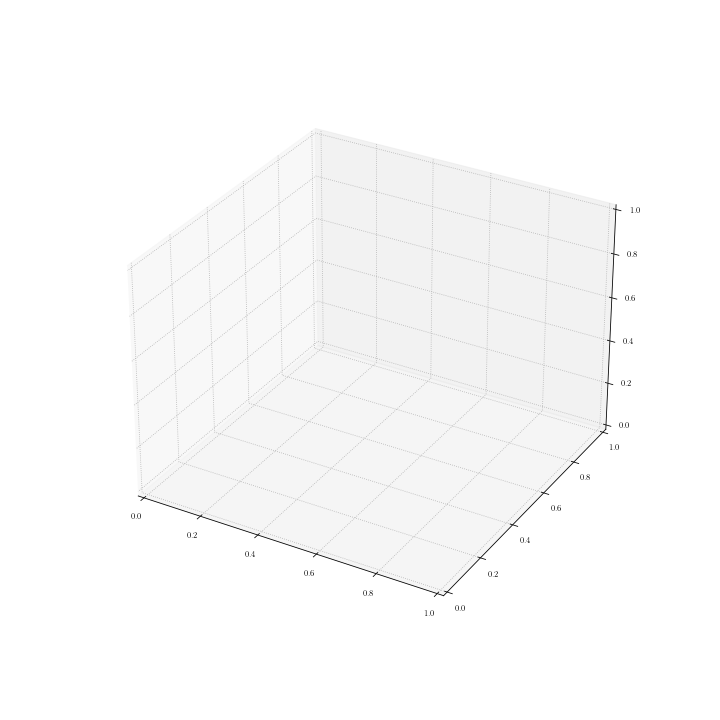

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import h5py

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

# Assuming star data is already loaded
subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=0)
sub_pos_0 = subhalo_0['SubhaloPos']
sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
star = il.snapshot.loadSubhalo(basePath, 99, 0, 'star', fields=['SubfindDensity','Coordinates','Masses'])

x = star['Coordinates'][:, 0] - sub_pos_0[0]
y = star['Coordinates'][:, 1] - sub_pos_0[1]
z = star['Coordinates'][:, 2] - sub_pos_0[2]
rho = star['SubfindDensity'] * 1e10 * h**2

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Open the HDF5 file
with h5py.File(hdf5_file_path, 'r') as hdf_file:
    if '240' in hdf_file:
        galaxy_group = hdf_file['240']
        x_traj = galaxy_group['x'][:]
        y_traj = galaxy_group['y'][:]
        z_traj = galaxy_group['z'][:]

        # Calculate the bounds of the trajectory
        x_min, x_max = x_traj.min(), x_traj.max()
        y_min, y_max = y_traj.min(), y_traj.max()
        z_min, z_max = z_traj.min(), z_traj.max()

        # Apply the mask to filter particles within the bounds
        # mask = ((x >= x_min) & (x <= x_max) & 
        #         (y >= y_min) & (y <= y_max) & 
        #         (z >= z_min) & (z <= z_max))
        radius = sub_Re_0  # 50 kpc
        distance_squared = (x - x_traj.mean())**2 + (y - y_traj.mean())**2 + (z - z_traj.mean())**2
        mask = distance_squared <= radius**2

        # Define the number of bins in each dimension
        num_bins = 100

        # Compute a 3D histogram of the density
        hist, edges = np.histogramdd(np.vstack([x[mask], y[mask], z[mask]]).T, bins=num_bins, weights=rho[mask], density=True)
        x_edges, y_edges, z_edges = edges

        # Compute the bin centers
        x_bin_centers = (x_edges[:-1] + x_edges[1:]) / 2
        y_bin_centers = (y_edges[:-1] + y_edges[1:]) / 2
        z_bin_centers = (z_edges[:-1] + z_edges[1:]) / 2

        # Flatten the histogram and the bin centers for plotting
        hist_flat = hist.ravel()
        x_bin_centers_flat = np.repeat(x_bin_centers, num_bins**2)
        y_bin_centers_flat = np.repeat(np.tile(y_bin_centers, num_bins), num_bins)
        z_bin_centers_flat = np.tile(z_bin_centers, num_bins**2)

        # Mask to remove bins with zero counts
        mask = hist_flat > 0

        bins = 500

        nPixels = [bins,bins]

        # Create a 3D scatter plot
        im = ax.imshow(rho,extent=[x_min, x_max, y_min, y_max, z_min, z_max],cmap='rainbow',interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())
        # img = ax.scatter(x_bin_centers_flat[mask], y_bin_centers_flat[mask], z_bin_centers_flat[mask],
        #                 c=hist_flat[mask], cmap=plt.cm.rainbow, norm=colors.LogNorm(), marker='.', edgecolor='none',alpha=0.8)

        # Plot the trajectory
        ax.plot(x_traj, y_traj, z_traj, color='black')

        # Set axis limits based on trajectory
        ax.set_xlim([x_min, x_max])
        ax.set_ylim([y_min, y_max])
        ax.set_zlim([z_min, z_max])

# Create a color bar
cbar = fig.colorbar(img, shrink=0.5, aspect=5)
cbar.set_label('Density ($M_\\odot/kpc^{3}$)')

# Set labels and title
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Star Density Distribution within Trajectory Bounds')

# Save the plot
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/Density_0.pdf')
plt.close(fig)

In [5]:
Group_R_Crit200 = il.groupcat.loadHalos(basePath, 99, fields=['Group_R_Crit200']) / h

In [6]:
Group_R_Crit200[0]

1198.2006

In [8]:
subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=0)
sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
print(sub_Re_0)

29.281168


In [3]:
import numpy as np
from mayavi import mlab
from scipy.interpolate import griddata

h = 0.6774
# Assuming star data is already loaded
x = star['Coordinates'][:, 0] - sub_pos_0[0]
y = star['Coordinates'][:, 1] - sub_pos_0[1]
z = star['Coordinates'][:, 2] - sub_pos_0[2]
rho = star['SubfindDensity'] * 1e10 * h**2

# Define grid dimensions
grid_x, grid_y, grid_z = np.mgrid[x.min():x.max():100j, y.min():y.max():100j, z.min():z.max():100j]

# Interpolate data onto a grid (can be memory intensive for large datasets)
grid_rho = griddata((x, y, z), rho, (grid_x, grid_y, grid_z), method='linear')

# Perform volume rendering
mlab.figure(size=(800, 800))
mlab.pipeline.volume(mlab.pipeline.scalar_field(grid_x, grid_y, grid_z, grid_rho))
mlab.xlabel('X (kpc)')
mlab.ylabel('Y (kpc)')
mlab.zlabel('Z (kpc)')
mlab.title('3D Star Density Distribution')

# Show the visualization
mlab.savefig('/home/bianyuan/workspace/pic/3Dtrack/3D_Density_Contours.pdf')

ModuleNotFoundError: No module named 'mayavi'

ValueError: object too deep for desired array

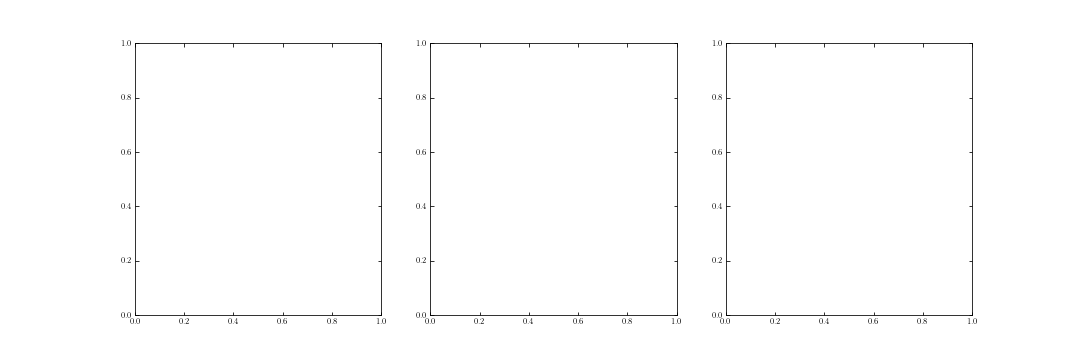

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=0)
sub_pos_0 = subhalo_0['SubhaloPos']
sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
star = il.snapshot.loadSubhalo(basePath, 99, 0, 'star', fields=['SubfindDensity','Coordinates','Masses'])

x = star['Coordinates'][:, 0] - sub_pos_0[0]
y = star['Coordinates'][:, 1] - sub_pos_0[1]
z = star['Coordinates'][:, 2] - sub_pos_0[2]
rho = star['SubfindDensity'] * 1e10 * h**2

with h5py.File(hdf5_file_path, 'r') as hdf_file:
    if '240' in hdf_file:
        galaxy_group = hdf_file['240']
        x_traj = galaxy_group['x'][:]
        y_traj = galaxy_group['y'][:]
        z_traj = galaxy_group['z'][:]

        radius = sub_Re_0
        distance_squared = (x - x_traj.mean())**2 + (y - y_traj.mean())**2 + (z - z_traj.mean())**2
        mask = distance_squared <= radius**2

        num_bins = 10
        hist, edges = np.histogramdd(np.vstack([x[mask], y[mask], z[mask]]).T, bins=num_bins, weights=rho[mask], density=True)
        x_edges, y_edges, z_edges = edges

        # Plotting 2D projections
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        titles = ['XY Plane', 'XZ Plane', 'YZ Plane']
        for ax, idx, title in zip(axs, [(0, 1), (0, 2), (1, 2)], titles):
            ax.hist2d(edges[idx[0]][:-1], edges[idx[1]][:-1], weights=hist.sum(axis=3-idx[0]-idx[1]), 
                      bins=num_bins, norm=colors.LogNorm(), cmap=plt.cm.rainbow)
            ax.set_title(title)
            ax.set_xlabel('X (kpc)' if idx[0] == 0 else 'Y (kpc)')
            ax.set_ylabel('Y (kpc)' if idx[1] == 1 else 'Z (kpc)')

        plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/2D_Projections.pdf')
        plt.close(fig)

In [ ]:
GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import matplotlib.patches as patches
from matplotlib import patheffects
from scipy.interpolate import interp1d
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

def find_local_min_max(distances):
    local_min, local_max = [], []
    for i in range(1, len(distances) - 1):
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            local_min.append(i)
        elif distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            local_max.append(i)
    return local_min, local_max

def find_apocenter_pericenter(x, y, z):
    distances = np.sqrt(x**2 + y**2 + z**2)
    local_min, local_max = find_local_min_max(distances)
    pericenter = local_min[0] if local_min else None
    # 找到第二个远心点
    apocenter = local_max[1] if len(local_max) > 1 else None
    return pericenter, apocenter

def smooth_trajectory_3d(x, y, z, num_points=1000):
    # 计算每个点之间的距离
    distance = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
    distance = np.insert(distance, 0, 0)
    cumulative_distance = np.cumsum(distance)

    # 创建插值函数
    f_x = interp1d(cumulative_distance, x, kind='cubic')
    f_y = interp1d(cumulative_distance, y, kind='cubic')
    f_z = interp1d(cumulative_distance, z, kind='cubic')

    # 创建等间距点
    new_distances = np.linspace(0, cumulative_distance[-1], num_points)

    # 插值新的x、y和z坐标
    new_x = f_x(new_distances)
    new_y = f_y(new_distances)
    new_z = f_z(new_distances)

    return new_x, new_y, new_z

def plot_orbit_with_gradient(ax, x_traj, y_traj, cmap):
    norm = Normalize(vmin=0, vmax=len(x_traj))
    mappable = ScalarMappable(norm=norm, cmap=cmap)

    for i in range(len(x_traj) - 1):
        ax.plot(x_traj[i:i+2], y_traj[i:i+2], color=mappable.to_rgba(i), linewidth=3)

with h5py.File(hdf5_file_path, 'r') as hdf_file:
    for galaxy_id in hdf_file.keys():
        if galaxy_id == '289415':

            galaxy_group = hdf_file[galaxy_id]
            mass_change_snap = galaxy_group['mass_change_snap'][()]

            GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
            cen_id = None
            # 遍历 GroupFirstSub，找到 ID 落入的两个相邻数之间
            for i in range(len(GroupFirstSub) - 1):
                if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                    print(i)
                    cen_id = GroupFirstSub[i]
                    break

            subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
            sub_pos_0 = subhalo_0['SubhaloPos']
            sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
            star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses','GFM_StellarPhotometrics'])
            stellar_mass = np.sum(star['Masses']) * 1e10 / h
            g = star['GFM_StellarPhotometrics'][4]
            i = star['GFM_StellarPhotometrics'][6]

            # x_traj = galaxy_group['x'][:]
            # y_traj = galaxy_group['y'][:]
            # z_traj = galaxy_group['z'][:]
            # vx_traj = galaxy_group['vx'][:]
            # vy_traj = galaxy_group['vy'][:]
            # vz_traj = galaxy_group['vz'][:]
            # 过滤距离为0的点
            x_traj = galaxy_group['x'][:][::-1]
            y_traj = galaxy_group['y'][:][::-1]
            z_traj = galaxy_group['z'][:][::-1]
            vx_traj = galaxy_group['vx'][:][::-1]
            vy_traj = galaxy_group['vy'][:][::-1]
            vz_traj = galaxy_group['vz'][:][::-1]
            snaps = galaxy_group['Snap'][:][::-1]

            distances = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
            filter_mask = distances > 0

            x_traj = x_traj[filter_mask]
            y_traj = y_traj[filter_mask]
            z_traj = z_traj[filter_mask]
            vx_traj = vx_traj[filter_mask]
            vy_traj = vy_traj[filter_mask]
            vz_traj = vz_traj[filter_mask]
            snaps = snaps[filter_mask]

            # 找到近心点和远心点
            # pericenter, apocenter = find_apocenter_pericenter(x_traj, y_traj, z_traj)
            # 找到近心点和第二个远心点
            pericenter, second_apocenter = find_apocenter_pericenter(x_traj, y_traj, z_traj)

            x_min, x_max = x_traj.min(), x_traj.max()
            y_min, y_max = y_traj.min(), y_traj.max()
            max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
            rmax = max_absolute_value + 30
            # rmax = 100
            bins = 800

            print(rmax)

            nPixels = [bins,bins]

            x = star['Coordinates'][:, 0] - sub_pos_0[0]
            y = star['Coordinates'][:, 1] - sub_pos_0[1]
            z = star['Coordinates'][:, 2] - sub_pos_0[2]
            rho = (star['Masses'] * 1e10 / h)/((rmax*rmax)/(bins*bins))

            # Plotting the projection
            # plt.style.use('dark_background')
            fig, ax = plt.subplots(figsize=(8, 8))
            plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99)

            ax.set_facecolor('black')

            for spine in ax.spines.values():
                spine.set_edgecolor('white')

            # img = ax.imshow(hist_xy.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], 
            #                 origin='lower', cmap=plt.cm.rainbow, norm=colors.LogNorm())
            grid, _, _, _ = stats.binned_statistic_2d(x, y, rho, 'sum', bins=nPixels, range=([-rmax,rmax],[-rmax,rmax]))

            im = ax.imshow(np.log10(grid.T/((2*rmax*2*rmax)/(bins*bins))),extent=[-rmax,rmax,-rmax,rmax],cmap='bone',interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())

            snap_idx = np.where(galaxy_group['Snap'][:] == mass_change_snap)[0]

            # Check if the index is valid and extract x, y coordinates for that snapshot
            if snap_idx.size > 0:
                snap_idx = snap_idx[0]
                x_snap = galaxy_group['x'][snap_idx]
                y_snap = galaxy_group['y'][snap_idx]
                z_snap = galaxy_group['z'][snap_idx]
            else:
                x_snap = y_snap = z_snap = None

            # if apocenter < pericenter:
            #     apocenter, pericenter = pericenter, apocenter  # 交换值，确保顺序正确

            # 重新计算远心点
            local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
            apocenters = local_max  # 更新远心点索引列表
                
            # 平滑轨迹
            smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

            # 计算平滑轨迹的累计距离
            smooth_distances = np.sqrt(np.diff(smooth_x)**2 + np.diff(smooth_y)**2)
            smooth_distances = np.insert(smooth_distances, 0, 0)
            smooth_cumulative_distance = np.cumsum(smooth_distances)

            # 计算原始轨迹的累计距离
            original_distances = np.sqrt(np.diff(x_traj)**2 + np.diff(y_traj)**2)
            original_distances = np.insert(original_distances, 0, 0)
            original_cumulative_distance = np.cumsum(original_distances)

            # 将原始轨迹的远心点索引映射到平滑轨迹上
            smooth_apocenters = []
            for index in apocenters:
                # 找到最接近原始远心点累计距离的平滑轨迹点
                closest_index = np.argmin(np.abs(smooth_cumulative_distance - original_cumulative_distance[index]))
                smooth_apocenters.append(closest_index)

            second_apocenter_smooth = smooth_apocenters[1]

            # 着重从起点到第二个远心点的部分
            ax.plot(smooth_x[:second_apocenter_smooth + 1], smooth_y[:second_apocenter_smooth + 1], color='white', linewidth=3)

            # 其余部分用灰线表示
            ax.plot(smooth_x[second_apocenter_smooth:], smooth_y[second_apocenter_smooth:], color='lightgrey', alpha=0.4, linestyle='--', linewidth=3)


            # smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

            # # 使用平滑的轨迹绘制（只用X和Y坐标）
            # plot_orbit_with_gradient(ax, smooth_x, smooth_y, cmap='gray_r')


            # specific_snaps = [99, 96, 90, 85, 79, 73, 70, 68, 66, 65, 64, 63]
            specific_snaps = [99, 69, 68, 67, 66, 65, 64, 63, 62, 61]
            # specific_snaps = [99, 95, 92, 87, 84, 61, 60, 59]

            for j, snap in enumerate(snaps):
                if round(snap, 2) in specific_snaps:
                    ax.plot(x_traj[j], y_traj[j], 'o', color='white', markeredgecolor='black', zorder=2)
                    text = ax.text(x_traj[j], y_traj[j], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
                    text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

            # # 标注时间
            # for i, snap in enumerate(snaps[:second_apocenter + 1]):
            #     ax.plot(x_traj[i], y_traj[i], 'o', color='white', markeredgecolor='black', zorder=2)  # 设置zorder为较高的值
                
            #     # 添加文本标签并设置轮廓线
            #     text = ax.text(x_traj[i], y_traj[i], "{:.2f} Gyr".format(snap), fontsize=10, color='black', zorder=3)
            #     text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='white')])

            # # 重新计算远心点
            # local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
            # apocenters = local_max  # 更新远心点索引列表

            # # 在远心点处标注时间
            # for apocenter_index in apocenters:
            #     snap = snaps[apocenter_index]
            #     ax.plot(x_traj[apocenter_index], y_traj[apocenter_index], 'o', color='white', markeredgecolor='black', zorder=2)
            #     text = ax.text(x_traj[apocenter_index], y_traj[apocenter_index], "{:.2f} Gyr".format(snap), fontsize=10, color='black', zorder=3)
            #     text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

            closest_distance = np.min(np.sqrt((x_traj) ** 2 + (y_traj) ** 2 + (z_traj) ** 2))
            stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
            # text = ax.text(-2900/3000 * rmax, 1800/3000 * rmax, "$M^{{\\mathrm{{Sat}}}}_{{\\mathrm{{ColdGas}}}} = {:.2e} {}$\n$d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}} = {:.2f} R_{{\\mathrm{{vir}}}}, {:.0f}$ kpc".format(cold_gas_mass, M_sun, Distance_normalized, Distance), color='white', fontsize=23)
            text_str = r"$\mathrm{ID}^{{\mathrm{sat}}} = " + str(galaxy_id) + r", \mathrm{ID}^{{\mathrm{host}}} = " + str(cen_id) + "$\n" + r"$M^{{\mathrm{host}}}_{{*}} = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "$min(d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}}) = $" + "{:.2f} kpc".format(closest_distance)
            bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.8)
            ax.text(250 / 3000 * rmax, 2250 / 3000 * rmax, text_str, fontsize=20, color='white', bbox=bbox_props)
            # text = ax.text(600 / 3000 * rmax, 2150 / 3000 * rmax, text_str, fontsize=20, color='black')
            # text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='white')])

            # 计算比例尺的长度和位置
            scale_length = int(rmax / 3)  # 比例尺的长度，例如10 kpc
            pixel_length = scale_length / (2 * rmax) * bins  # 将物理长度转换为像素长度

            # 设置比例尺的位置
            scale_x_end = rmax - 0.05 * 2 * rmax  # 比例尺的结束位置，距离右边界一定距离
            scale_x_start = scale_x_end - pixel_length  # 比例尺的起始位置
            scale_y_position = -rmax + 0.05 * 2 * rmax  # 比例尺的垂直位置，距离下边界一定距离

            # 添加比例尺
            ax.hlines(scale_y_position, scale_x_start, scale_x_end, color='white', lw=4)

            # 添加比例尺文本
            scale_text = ax.text(scale_x_start + pixel_length / 2, scale_y_position + 0.025 * 2 * rmax, f'{scale_length} kpc', color='white', fontsize=15, ha='center', va='center')
            # scale_text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])


            # Add white edge to the scale text
            # scale_text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])

            # Create a color bar
            # cbar = fig.colorbar(im, pad=0)
            # cbar.set_label('Density ($M_\\odot/kpc^{2}$)', fontsize=20)
            # cbar.ax.tick_params(labelsize=18)

            # ax.tick_params(axis='x', which='both', labelsize=20)
            # ax.tick_params(axis='y', which='both', labelsize=20)
            # # Set labels and title
            # ax.set_xlabel('X (kpc)', fontsize=20)
            # ax.set_ylabel('Y (kpc)', fontsize=20)

            # ax.set_xlim(-100,100)
            # ax.set_ylim(-100,100)

            ax.set_xticklabels([])
            ax.set_xticks([])
            ax.set_yticklabels([])
            ax.set_yticks([])

            # Save the plot
            plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/2Dtrack/2D_Projection_XY_'+str(galaxy_id)+'.pdf')
            plt.close(fig)

# xyz5l

16
207.37326384083443


/tmp/ipykernel_789523/1770093879.py:145: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid.T/((2*rmax*2*rmax)/(bins*bins))),extent=[-rmax,rmax,-rmax,rmax],cmap='bone',interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import random
import matplotlib.patches as patches
from matplotlib import patheffects

def add_scalebar(lon0, lat0, length, rmax, ax):
    font = {
        'family': 'serif',
        'style': 'normal',
        'weight': 'bold',
        'color': 'black',
        'size': 16
    }
    ax.hlines(y=lat0, xmin=lon0, xmax=lon0+length, colors="black", ls="-", lw=4, label='%d kpc' % (length), color="black")
    ax.vlines(x=lon0, ymin=lat0-0.45, ymax=lat0+0.45, colors="black", ls="-", lw=4, color="black")
    ax.vlines(x=lon0+length, ymin=lat0-0.45, ymax=lat0+0.45, colors="black", ls="-", lw=4, color="black")
    if length >= 1000:
        ax.text(lon0+length/2, lat0+200/3000*(rmax), '%d kpc' % (length/1000), horizontalalignment='center', fontdict=font)
    else:
        ax.text(lon0+length/2, lat0+200/3000*(rmax), '%.1f kpc' % (length/1000), horizontalalignment='center', fontdict=font)

# 定义函数来找到局部最小和最大值
def find_local_min_max(distances):
    local_min, local_max = [], []
    for i in range(1, len(distances) - 1):
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            local_min.append(i)
        elif distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            local_max.append(i)
    return local_min, local_max

# 定义找到第二个远心点的函数
def find_second_apocenter(x, y, z):
    distances = np.sqrt(x**2 + y**2 + z**2)
    _, local_max = find_local_min_max(distances)
    second_apocenter = local_max[1] if len(local_max) > 1 else None
    return second_apocenter

def find_apocenter_pericenter(x, y, z):
    distances = np.sqrt(x**2 + y**2 + z**2)
    local_min, local_max = find_local_min_max(distances)
    pericenter = local_min[0] if local_min else None
    # 找到第二个远心点
    apocenter = local_max[1] if len(local_max) > 1 else None
    return pericenter, apocenter

def smooth_trajectory_3d(x, y, z, num_points=1000):
    # 计算每个点之间的距离
    distance = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
    distance = np.insert(distance, 0, 0)
    cumulative_distance = np.cumsum(distance)

    # 创建插值函数
    f_x = interp1d(cumulative_distance, x, kind='cubic')
    f_y = interp1d(cumulative_distance, y, kind='cubic')
    f_z = interp1d(cumulative_distance, z, kind='cubic')

    # 创建等间距点
    new_distances = np.linspace(0, cumulative_distance[-1], num_points)

    # 插值新的x、y和z坐标
    new_x = f_x(new_distances)
    new_y = f_y(new_distances)
    new_z = f_z(new_distances)

    return new_x, new_y, new_z

h = 0.6774

# 路径到 HDF5 文件
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

# 随机选取9个星系ID
# with h5py.File(hdf5_file_path, 'r') as hdf_file:
#     selected_ids = random.sample(list(hdf_file.keys()), 9)
# selected_ids = ['117330','240','125','117459','275579','282892','275670','275629','414']
# selected_ids = ['240','117330','210','117459','271','255','220656','289415','516']
selected_ids = ['120','255','117323','220656','275588', '275615','282892','289415','313735']

# 创建一个3x3的子图布局
fig, axs = plt.subplots(3, 3, figsize=(14, 14), gridspec_kw={'hspace': 0, 'wspace': 0})
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99)
axs = axs.flatten()

# 循环处理每个星系
for idx, galaxy_id in enumerate(selected_ids):
    with h5py.File(hdf5_file_path, 'r') as hdf_file:
        galaxy_group = hdf_file[galaxy_id]

        GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
        cen_id = None
        for i in range(len(GroupFirstSub) - 1):
            if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                cen_id = GroupFirstSub[i]
                break

        subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
        sub_pos_0 = subhalo_0['SubhaloPos']
        sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
        star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses'])

        # 翻转轨迹数据
        x_traj = galaxy_group['x'][:][::-1]
        y_traj = galaxy_group['y'][:][::-1]
        z_traj = galaxy_group['z'][:][::-1]
        vx_traj = galaxy_group['vx'][:][::-1]
        vy_traj = galaxy_group['vy'][:][::-1]
        vz_traj = galaxy_group['vz'][:][::-1]
        snaps = galaxy_group['Snap'][:][::-1]

        distances = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
        filter_mask = distances > 0

        x_traj = x_traj[filter_mask]
        y_traj = y_traj[filter_mask]
        z_traj = z_traj[filter_mask]
        vx_traj = vx_traj[filter_mask]
        vy_traj = vy_traj[filter_mask]
        vz_traj = vz_traj[filter_mask]
        snaps = snaps[filter_mask]

        # 找到第二个远心点
        second_apocenter = find_second_apocenter(x_traj, y_traj, z_traj)

        x_min, x_max = x_traj.min(), x_traj.max()
        y_min, y_max = y_traj.min(), y_traj.max()
        max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
        rmax = max_absolute_value + 30
        # rmax = 100
        range_ = [np.min(x_traj), np.max(x_traj)], [np.min(y_traj), np.max(y_traj)]

        x = star['Coordinates'][:, 0] - sub_pos_0[0]
        y = star['Coordinates'][:, 1] - sub_pos_0[1]
        z = star['Coordinates'][:, 2] - sub_pos_0[2]

        # 显示宿主星系的面密度分布
        bins = 500
        nPixels = [bins, bins]
        rho = (star['Masses'] * 1e10 / h) / ((rmax * rmax) / (bins * bins))

        # 绘制宿主星系的面密度分布
        grid, _, _, _ = stats.binned_statistic_2d(y, x, rho, 'sum', bins=nPixels, range=([-rmax, rmax], [-rmax, rmax]))
        im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='gray', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())

        # 重新计算远心点
        local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
        apocenters = local_max  # 更新远心点索引列表
            
        # 平滑轨迹
        smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

        # 计算平滑轨迹的累计距离
        smooth_distances = np.sqrt(np.diff(smooth_x)**2 + np.diff(smooth_y)**2)
        smooth_distances = np.insert(smooth_distances, 0, 0)
        smooth_cumulative_distance = np.cumsum(smooth_distances)

        # 计算原始轨迹的累计距离
        original_distances = np.sqrt(np.diff(x_traj)**2 + np.diff(y_traj)**2)
        original_distances = np.insert(original_distances, 0, 0)
        original_cumulative_distance = np.cumsum(original_distances)

        # 将原始轨迹的远心点索引映射到平滑轨迹上
        smooth_apocenters = []
        for index in apocenters:
            # 找到最接近原始远心点累计距离的平滑轨迹点
            closest_index = np.argmin(np.abs(smooth_cumulative_distance - original_cumulative_distance[index]))
            smooth_apocenters.append(closest_index)

        second_apocenter_smooth = smooth_apocenters[1]

        # 着重从起点到第二个远心点的部分
        axs[idx].plot(smooth_x[:second_apocenter_smooth + 1], smooth_y[:second_apocenter_smooth + 1], color='black', linewidth=3)

        # 其余部分用灰线表示
        axs[idx].plot(smooth_x[second_apocenter_smooth:], smooth_y[second_apocenter_smooth:], color='lightgrey', linestyle='--', linewidth=3)

        # # 画出轨迹
        # axs[idx].plot(x_traj[:second_apocenter + 1], y_traj[:second_apocenter + 1], 'black', linestyle='-', linewidth=4)  # 着重部分
        # axs[idx].plot(x_traj[second_apocenter:], y_traj[second_apocenter:], 'gray', linestyle='--', linewidth=2)  # 其余部分

        # # 标注时间
        # for j, snap in enumerate(snaps[:second_apocenter + 1]):
        #     axs[idx].plot(x_traj[j], y_traj[j], 'o', color='white', markeredgecolor='black', zorder=2)
        #     text = axs[idx].text(x_traj[j], y_traj[j], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='white', zorder=3)
        #     text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='white')])

        # 标注时间
        for i, snap in enumerate(snaps[:second_apocenter + 1]):
            axs[idx].plot(x_traj[i], y_traj[i], 'o', color='white', markeredgecolor='black', zorder=2)  # 设置zorder为较高的值
            
            # 添加文本标签并设置轮廓线
            text = axs[idx].text(x_traj[i], y_traj[i], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
            text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='white')])

        # 重新计算远心点
        local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
        apocenters = local_max  # 更新远心点索引列表

        # 在远心点处标注时间
        for apocenter_index in apocenters:
            snap = snaps[apocenter_index]
            axs[idx].plot(x_traj[apocenter_index], y_traj[apocenter_index], 'o', color='white', markeredgecolor='black', zorder=2)
            text = axs[idx].text(x_traj[apocenter_index], y_traj[apocenter_index], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
            text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

        closest_distance = np.min(np.sqrt((x_traj) ** 2 + (y_traj) ** 2 + (z_traj) ** 2))
        stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
        text_str = r"$\mathrm{ID}^{{\mathrm{sat}}} = " + str(galaxy_id) + r", \mathrm{ID}^{{\mathrm{host}}} = " + str(cen_id) + "$\n" + r"$M^{{\mathrm{host}}}_{{*}} = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "$min(d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}}) = $" + "{:.2f} kpc".format(closest_distance)
        bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.8)
        axs[idx].text(-2950 / 3000 * rmax, 2250 / 3000 * rmax, text_str, fontsize=12, color='white', bbox=bbox_props)
        
        scale_length = int(rmax/3)  # 10 kpc
        pixel_length = int(rmax/3) / (2 * rmax) * bins  # Convert physical length to pixel length
        scale_x_start = -rmax + 0.05 * 2 * rmax  # Starting position of the scale bar
        scale_x_end = scale_x_start + pixel_length  # Ending position of the scale bar
        scale_y_position = -rmax + 0.05 * 2 * rmax

        # # Create a background rectangle for the scale bar and text
        # rect_height = 0.06 * 2 * rmax  # Adjust height as needed
        # rect_y_position = scale_y_position - rect_height / 5
        # background_rect = patches.Rectangle((scale_x_start, rect_y_position), pixel_length, rect_height, color='gray', alpha=0.8, edgecolor=None)
        # ax.add_patch(background_rect)

        # Add the scale bar line segment with a white edge
        axs[idx].hlines(scale_y_position, scale_x_start, scale_x_end, color='white', lw=4)

        # Add scale text with background and white edge
        scale_text = axs[idx].text(scale_x_start + pixel_length / 2, scale_y_position + 0.025 * 2 * rmax, f'{scale_length} kpc', color='white', fontsize=15, ha='center', va='center')

        # # 计算比例尺的长度和位置
        # scale_length = int(rmax / 3)  # 比例尺的长度，例如10 kpc
        # pixel_length = scale_length / (2 * rmax) * bins  # 将物理长度转换为像素长度

        # # 设置比例尺的位置
        # scale_x_end = rmax - 0.05 * 2 * rmax  # 比例尺的结束位置，距离右边界一定距离
        # scale_x_start = scale_x_end - pixel_length  # 比例尺的起始位置
        # scale_y_position = -rmax + 0.05 * 2 * rmax  # 比例尺的垂直位置，距离下边界一定距离

        # # 添加比例尺
        # axs[idx].hlines(scale_y_position, scale_x_start, scale_x_end, color='white', lw=4)

        # # 添加比例尺文本
        # scale_text = axs[idx].text(scale_x_start + pixel_length / 2, scale_y_position + 0.025 * 2 * rmax, f'{scale_length} kpc', color='white', fontsize=15, ha='center', va='center')

        axs[idx].set_xticklabels([])
        axs[idx].set_xticks([])
        axs[idx].set_yticklabels([])
        axs[idx].set_yticks([])

# # 添加统一的colorbar
# cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=1, pad=0)
# cbar.set_label('Density ($M_\\odot/\mathrm{kpc}^{2}$)', fontsize=20)
# cbar.ax.tick_params(labelsize=18)

# 保存整个图像
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/3Dtrack/3D_Projections_9Galaxies.pdf')
plt.close(fig)

# xyzlll

/tmp/ipykernel_33023/1389556499.py:147: RuntimeWarning: divide by zero encountered in log10
  im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='gray', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import matplotlib.patches as patches
from matplotlib import patheffects
from scipy.interpolate import interp1d
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/track/MRO_grp_orbit2D.hdf5'

def find_local_min_max(distances):
    local_min, local_max = [], []
    for i in range(1, len(distances) - 1):
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            local_min.append(i)
        elif distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            local_max.append(i)
    return local_min, local_max

def smooth_trajectory_3d(x, y, z, num_points=1000):
    # 计算每个点之间的距离
    distance = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
    distance = np.insert(distance, 0, 0)
    cumulative_distance = np.cumsum(distance)

    # 创建插值函数
    f_x = interp1d(cumulative_distance, x, kind='cubic')
    f_y = interp1d(cumulative_distance, y, kind='cubic')
    f_z = interp1d(cumulative_distance, z, kind='cubic')

    # 创建等间距点
    new_distances = np.linspace(0, cumulative_distance[-1], num_points)

    # 插值新的x、y和z坐标
    new_x = f_x(new_distances)
    new_y = f_y(new_distances)
    new_z = f_z(new_distances)

    return new_x, new_y, new_z

def plot_orbit_with_gradient(ax, x_traj, y_traj, cmap):
    norm = Normalize(vmin=0, vmax=len(x_traj))
    mappable = ScalarMappable(norm=norm, cmap=cmap)

    for i in range(len(x_traj) - 1):
        ax.plot(x_traj[i:i+2], y_traj[i:i+2], color=mappable.to_rgba(i), linewidth=3)

with h5py.File(hdf5_file_path, 'r') as hdf_file:
    for galaxy_id in hdf_file.keys():
        if galaxy_id == '414930':
            galaxy_group = hdf_file[galaxy_id]

            # GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
            # Group_R_Crit200 = il.groupcat.loadHalos(basePath, 99, fields=['Group_R_Crit200'])
            # cen_id = None
            # # 遍历 GroupFirstSub，找到 ID 落入的两个相邻数之间
            # for i in range(len(GroupFirstSub) - 1):
            #     if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
            #         cen_id = GroupFirstSub[i]
            #         Rvir = Group_R_Crit200[i]
            #         break


            subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=int(galaxy_id))
            haloID = subhalo_0['SubhaloGrNr']
            halo = il.groupcat.loadSingle(basePath, 99, haloID=subhalo_0['SubhaloGrNr'])
            cen_id = halo['GroupFirstSub']
            Rvir = halo['Group_R_Crit200']
            sub_pos_0 = subhalo_0['SubhaloPos']
            sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
            star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses','GFM_StellarPhotometrics'])
            stellar_mass = np.sum(star['Masses']) * 1e10 / h

            x_traj = galaxy_group['x'][:][::-1]
            y_traj = galaxy_group['y'][:][::-1]
            z_traj = galaxy_group['z'][:][::-1]
            snaps = galaxy_group['Snap'][:][::-1]
            # ... Load other trajectory data (vx_traj, vy_traj, vz_traj, snaps) ...

            distances = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
            # filter_mask = (0 < distances) & (distances < Rvir)
            filter_mask = snaps >= 50

            x_traj = x_traj[filter_mask]
            y_traj = y_traj[filter_mask]
            z_traj = z_traj[filter_mask]
            snaps = snaps[filter_mask]
            # ... Apply filter_mask to other trajectory data ...

            if len(x_traj) > 0:
                x_min, x_max = x_traj.min(), x_traj.max()
                y_min, y_max = y_traj.min(), y_traj.max()
                max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
                rmax = max_absolute_value + 30

                print(rmax)

                bins = 800

                nPixels = [bins,bins]

                x = star['Coordinates'][:, 0] - sub_pos_0[0]
                y = star['Coordinates'][:, 1] - sub_pos_0[1]
                z = star['Coordinates'][:, 2] - sub_pos_0[2]
                rho = (star['Masses'] * 1e10 / h)/((rmax*rmax)/(bins*bins))

                # plt.style.use('dark_background')
                # plt.style.use('default')
                fig, ax = plt.subplots(figsize=(8, 8))
                plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99)

                ax.set_facecolor('black')

                for spine in ax.spines.values():
                    spine.set_edgecolor('white')

                grid, _, _, _ = stats.binned_statistic_2d(x, y, rho, 'sum', bins=nPixels, range=([-rmax,rmax],[-rmax,rmax]))
                im = ax.imshow(np.log10(np.rot90(grid.T,3)/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='bone', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())

                # Plot the orbit with gradient color
                # plot_orbit_with_gradient(ax, x_traj, y_traj, cmap='gray_r')
                # 在绘制前平滑轨迹
                smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

                # 使用平滑的轨迹绘制（只用X和Y坐标）
                plot_orbit_with_gradient(ax, smooth_x, smooth_y, cmap='gray_r')

                # 重新计算远心点
                local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
                apocenters = local_max  # 更新远心点索引列表

                # # 在远心点处标注时间
                # for apocenter_index in apocenters:
                #     snap = snaps[apocenter_index]
                #     ax.plot(x_traj[apocenter_index], y_traj[apocenter_index], 'o', color='white', markeredgecolor='black', zorder=2)
                #     text = ax.text(x_traj[apocenter_index], y_traj[apocenter_index], "{:.2f} Gyr".format(snap), fontsize=10, color='black', zorder=3)
                #     text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

                # specific_snaps = [99, 87, 80, 73, 67, 64, 63, 61, 55, snaps[0]]
                specific_snaps = [67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50]

                # print(snaps)

                # 标注时间
                for j, snap in enumerate(snaps):
                    if round(snap, 2) in specific_snaps:
                        ax.plot(x_traj[j], y_traj[j], 'o', color='white', markeredgecolor='black', zorder=2)
                        text = ax.text(x_traj[j], y_traj[j], "{:.2f} Gyr".format(snap), fontsize=10, color='black', zorder=3)
                        # text = ax.text(x_traj[j], y_traj[j], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
                        # text = ax.text(x_traj[j], y_traj[j], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
                        text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])
                
                closest_distance = np.min(np.sqrt((x_traj) ** 2 + (y_traj) ** 2 + (z_traj) ** 2))
                stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
                text_str = r"$\mathrm{ID}^{{\mathrm{sat}}} = " + str(galaxy_id) + r", \mathrm{ID}^{{\mathrm{host}}} = " + str(cen_id) + "$\n" + r"$M^{{\mathrm{host}}}_{{*}} = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "$min(d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}}) = $" + "{:.2f} kpc".format(closest_distance)
                bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.8)
                ax.text(135 / 3000 * rmax, 1200 / 3000 * rmax, text_str, fontsize=20, color='white', bbox=bbox_props)

                scale_length = int(rmax/3)  # 10 kpc
                pixel_length = int(rmax/3) / (2 * rmax) * bins  # Convert physical length to pixel length
                scale_x_start = -rmax + 0.05 * 2 * rmax  # Starting position of the scale bar
                scale_x_end = scale_x_start + pixel_length  # Ending position of the scale bar
                scale_y_position = -rmax + 0.05 * 2 * rmax

                # # Create a background rectangle for the scale bar and text
                # rect_height = 0.06 * 2 * rmax  # Adjust height as needed
                # rect_y_position = scale_y_position - rect_height / 5
                # background_rect = patches.Rectangle((scale_x_start, rect_y_position), pixel_length, rect_height, color='gray', alpha=0.8, edgecolor=None)
                # ax.add_patch(background_rect)

                # Add the scale bar line segment with a white edge
                ax.hlines(scale_y_position+125, scale_x_start+200, scale_x_end, color='white', lw=4)

                # Add scale text with background and white edge
                scale_text = ax.text((scale_x_start + pixel_length / 2) + 100, scale_y_position + 0.025 * 2 * rmax + 118, f'{scale_length} kpc', color='white', fontsize=15, ha='center', va='center')

                # Add white edge to the scale text
                # scale_text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])

                ax.set_xticklabels([])
                ax.set_xticks([])
                ax.set_yticklabels([])
                ax.set_yticks([])

                # ax.set_xlim(-150,150)
                # ax.set_ylim(-150,150)

                # Save the plot
                plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/MRO_grp_2Dtrack/2D_Projection_XY_'+str(galaxy_id)+'.pdf')
                plt.close(fig)
            else:
                continue

282.25125479775613


/tmp/ipykernel_90559/3848474261.py:122: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(np.rot90(grid.T,3)/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='bone', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import matplotlib.patches as patches
from matplotlib import patheffects
from scipy.interpolate import interp1d
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/track/MP_fl_orbit2D.hdf5'

def find_local_min_max(distances):
    local_min, local_max = [], []
    for i in range(1, len(distances) - 1):
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            local_min.append(i)
        elif distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            local_max.append(i)
    return local_min, local_max

def smooth_trajectory_3d(x, y, z, num_points=1000, kind='cubic'):
    # 计算每个点之间的距离
    distance = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
    distance = np.insert(distance, 0, 0)
    cumulative_distance = np.cumsum(distance)

    # 检查是否有足够的数据点进行插值
    if len(np.unique(cumulative_distance)) < 4:
        # 数据点不足以进行三次样条插值
        return x, y, z

    # 创建插值函数
    f_x = interp1d(cumulative_distance, x, kind=kind)
    f_y = interp1d(cumulative_distance, y, kind=kind)
    f_z = interp1d(cumulative_distance, z, kind=kind)

    # 创建等间距点
    new_distances = np.linspace(0, cumulative_distance[-1], num_points)

    # 插值新的x、y和z坐标
    new_x = f_x(new_distances)
    new_y = f_y(new_distances)
    new_z = f_z(new_distances)

    return new_x, new_y, new_z

def plot_orbit_with_gradient(ax, x_traj, y_traj, cmap):
    norm = Normalize(vmin=0, vmax=len(x_traj))
    mappable = ScalarMappable(norm=norm, cmap=cmap)

    for i in range(len(x_traj) - 1):
        ax.plot(x_traj[i:i+2], y_traj[i:i+2], color=mappable.to_rgba(i), linewidth=3)

with h5py.File(hdf5_file_path, 'r') as hdf_file:
    for galaxy_id in hdf_file.keys():
        galaxy_group = hdf_file[galaxy_id]

        GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
        Group_R_Crit200 = il.groupcat.loadHalos(basePath, 99, fields=['Group_R_Crit200'])
        cen_id = None
        # 遍历 GroupFirstSub，找到 ID 落入的两个相邻数之间
        for i in range(len(GroupFirstSub) - 1):
            if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                cen_id = GroupFirstSub[i]
                Rvir = Group_R_Crit200[i]
                break

        subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
        sub_pos_0 = subhalo_0['SubhaloPos']
        sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
        star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses','GFM_StellarPhotometrics'])
        stellar_mass = np.sum(star['Masses']) * 1e10 / h

        x_traj = galaxy_group['x'][:][::-1]
        y_traj = galaxy_group['y'][:][::-1]
        z_traj = galaxy_group['z'][:][::-1]
        snaps = galaxy_group['Snap'][:][::-1]
        # ... Load other trajectory data (vx_traj, vy_traj, vz_traj, snaps) ...

        distances = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
        filter_mask = (0 < distances) & (distances < Rvir)

        x_traj = x_traj[filter_mask]
        y_traj = y_traj[filter_mask]
        z_traj = z_traj[filter_mask]
        snaps = snaps[filter_mask]
        # ... Apply filter_mask to other trajectory data ...

        if len(x_traj) > 0:
            x_min, x_max = x_traj.min(), x_traj.max()
            y_min, y_max = y_traj.min(), y_traj.max()
            max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
            rmax = max_absolute_value + 10

            print(rmax)

            bins = 500

            nPixels = [bins,bins]

            x = star['Coordinates'][:, 0] - sub_pos_0[0]
            y = star['Coordinates'][:, 1] - sub_pos_0[1]
            z = star['Coordinates'][:, 2] - sub_pos_0[2]
            rho = (star['Masses'] * 1e10 / h)/((rmax*rmax)/(bins*bins))

            plt.style.use('dark_background')
            fig, ax = plt.subplots(figsize=(10, 8))
            grid, _, _, _ = stats.binned_statistic_2d(y, x, rho, 'sum', bins=nPixels, range=([-rmax,rmax],[-rmax,rmax]))
            im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())

            # Plot the orbit with gradient color
            # plot_orbit_with_gradient(ax, x_traj, y_traj, cmap='gray_r')
            # 在绘制前平滑轨迹
            smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

            # 使用平滑的轨迹绘制（只用X和Y坐标）
            plot_orbit_with_gradient(ax, smooth_x, smooth_y, cmap='gray_r')

            for i, snap in enumerate(snaps):
                ax.plot(x_traj[i], y_traj[i], 'o', color='white', markeredgecolor='black', zorder=2)
                text = ax.text(x_traj[i], y_traj[i], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
                text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

            # specific_snaps = [99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89, 88, , snaps[0]]

            # # 标注时间
            # for j, snap in enumerate(snaps):
            #     if round(snap, 2) in specific_snaps:
            #         ax.plot(x_traj[j], y_traj[j], 'o', color='white', markeredgecolor='black', zorder=2)
            #         text = ax.text(x_traj[j], y_traj[j], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
            #         text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])
            
            closest_distance = np.min(np.sqrt((x_traj) ** 2 + (y_traj) ** 2 + (z_traj) ** 2))
            stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
            text_str = r"$\mathrm{ID}^{{\mathrm{sat}}} = " + str(galaxy_id) + r", \mathrm{ID}^{{\mathrm{host}}} = " + str(cen_id) + "$\n" + r"$M^{{\mathrm{host}}}_{{*}} = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "$min(d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}}) = $" + "{:.2f} kpc".format(closest_distance)
            bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.8)
            ax.text(-2950 / 3000 * rmax, 2250 / 3000 * rmax, text_str, fontsize=20, color='white', bbox=bbox_props)

            scale_length = int(rmax/3)  # 10 kpc
            pixel_length = int(rmax/3) / (2 * rmax) * bins  # Convert physical length to pixel length
            scale_x_start = -rmax + 0.05 * 2 * rmax  # Starting position of the scale bar
            scale_x_end = scale_x_start + pixel_length  # Ending position of the scale bar
            scale_y_position = -rmax + 0.05 * 2 * rmax

            # # Create a background rectangle for the scale bar and text
            # rect_height = 0.06 * 2 * rmax  # Adjust height as needed
            # rect_y_position = scale_y_position - rect_height / 5
            # background_rect = patches.Rectangle((scale_x_start, rect_y_position), pixel_length, rect_height, color='gray', alpha=0.8, edgecolor=None)
            # ax.add_patch(background_rect)

            # Add the scale bar line segment with a white edge
            ax.hlines(scale_y_position, scale_x_start, scale_x_end, color='white', lw=4)

            # Add scale text with background and white edge
            scale_text = ax.text(scale_x_start + pixel_length / 2, scale_y_position + 0.025 * 2 * rmax, f'{scale_length} kpc', color='white', fontsize=15, ha='center', va='center')

            # Add white edge to the scale text
            # scale_text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])

            ax.set_xticklabels([])
            ax.set_xticks([])
            ax.set_yticklabels([])
            ax.set_yticks([])

            # Save the plot
            plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/MP_fl_2Dtrack/2D_Projection_XY_'+str(galaxy_id)+'.pdf')
            plt.close(fig)
        else:
            continue
# MP_cl_orbit2D

137.15026837448332


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


116.10386161702834


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


126.52146534543844


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


118.52328295689401


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


91.7665660983171


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


88.02408565839977


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


97.35577898951875


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


105.48803328904636


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


80.73701149529681


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


106.17425081192796


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


100.27508672866844


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


122.21386459255979


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


89.84919360791261


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


68.92244242692648


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


83.72225143932684


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


81.84992999427959


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


83.3117463140316


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


101.67779607691172


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


90.12887049749041


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


105.06851795467966


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


93.83963500147624


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


90.50657846176557


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


92.7865217652052


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


78.64481842338353


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


67.92771534543844


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


93.11305174195454


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


95.99055211101269


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


71.50584957189253


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


69.24248505314438


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


74.9254041186891


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


66.73692611455564


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


77.7279395482728


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


45.90532274136404


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


71.04452686743431


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


76.39298697224683


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


56.29048971711692


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


53.13943940064954


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


43.85531997342781


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


70.12908962577502


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


66.54086396516091


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


75.25697981251845


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


61.6710261662238


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


57.71230070859168


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


64.62060820785356


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


49.79773306023029


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


57.51912182609979


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


52.35519080307056


/tmp/ipykernel_9284/562237087.py:112: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid/((2*rmax*2*rmax)/(bins*bins))), extent=[-rmax,rmax,-rmax,rmax], cmap='gray', interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import random
import matplotlib.patches as patches
from matplotlib import patheffects

def add_scalebar(lon0, lat0, length, rmax, ax):
    font = {
        'family': 'serif',
        'style': 'normal',
        'weight': 'bold',
        'color': 'black',
        'size': 16
    }
    ax.hlines(y=lat0, xmin=lon0, xmax=lon0+length, colors="black", ls="-", lw=4, label='%d kpc' % (length), color="black")
    ax.vlines(x=lon0, ymin=lat0-0.45, ymax=lat0+0.45, colors="black", ls="-", lw=4, color="black")
    ax.vlines(x=lon0+length, ymin=lat0-0.45, ymax=lat0+0.45, colors="black", ls="-", lw=4, color="black")
    if length >= 1000:
        ax.text(lon0+length/2, lat0+200/3000*(rmax), '%d kpc' % (length/1000), horizontalalignment='center', fontdict=font)
    else:
        ax.text(lon0+length/2, lat0+200/3000*(rmax), '%.1f kpc' % (length/1000), horizontalalignment='center', fontdict=font)

# 定义函数来找到局部最小和最大值
def find_local_min_max(distances):
    local_min, local_max = [], []
    for i in range(1, len(distances) - 1):
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            local_min.append(i)
        elif distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            local_max.append(i)
    return local_min, local_max

# 定义找到第二个远心点的函数
def find_second_apocenter(x, y, z):
    distances = np.sqrt(x**2 + y**2 + z**2)
    _, local_max = find_local_min_max(distances)
    second_apocenter = local_max[1] if len(local_max) > 1 else None
    return second_apocenter

def find_apocenter_pericenter(x, y, z):
    distances = np.sqrt(x**2 + y**2 + z**2)
    local_min, local_max = find_local_min_max(distances)
    pericenter = local_min[0] if local_min else None
    # 找到第二个远心点
    apocenter = local_max[1] if len(local_max) > 1 else None
    return pericenter, apocenter

def smooth_trajectory_3d(x, y, z, num_points=1000):
    # 计算每个点之间的距离
    distance = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
    distance = np.insert(distance, 0, 0)
    cumulative_distance = np.cumsum(distance)

    # 创建插值函数
    f_x = interp1d(cumulative_distance, x, kind='cubic')
    f_y = interp1d(cumulative_distance, y, kind='cubic')
    f_z = interp1d(cumulative_distance, z, kind='cubic')

    # 创建等间距点
    new_distances = np.linspace(0, cumulative_distance[-1], num_points)

    # 插值新的x、y和z坐标
    new_x = f_x(new_distances)
    new_y = f_y(new_distances)
    new_z = f_z(new_distances)

    return new_x, new_y, new_z

h = 0.6774

# 路径到 HDF5 文件
hdf5_file_path = '/home/bianyuan/workspace/data/track/MRO_cl_orbit2D.hdf5'

# 随机选取9个星系ID
# with h5py.File(hdf5_file_path, 'r') as hdf_file:
#     selected_ids = random.sample(list(hdf_file.keys()), 9)
# selected_ids = ['117330','240','125','117459','275579','282892','275670','275629','414']
selected_ids = ['395','97019','117357','167434','184979','198281','208970','253892','319748']

# 创建一个3x3的子图布局
fig, axs = plt.subplots(3, 3, figsize=(14, 14), gridspec_kw={'hspace': 0, 'wspace': 0})
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99)
axs = axs.flatten()

# 循环处理每个星系
for idx, galaxy_id in enumerate(selected_ids):
    with h5py.File(hdf5_file_path, 'r') as hdf_file:
        galaxy_group = hdf_file[galaxy_id]

        GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
        Group_R_Crit200 = il.groupcat.loadHalos(basePath, 99, fields=['Group_R_Crit200'])
        cen_id = None
        for i in range(len(GroupFirstSub) - 1):
            if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                cen_id = GroupFirstSub[i]
                Rvir = Group_R_Crit200[i]
                break

        subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
        sub_pos_0 = subhalo_0['SubhaloPos']
        sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
        star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses'])

        # 翻转轨迹数据
        x_traj = galaxy_group['x'][:][::-1]
        y_traj = galaxy_group['y'][:][::-1]
        z_traj = galaxy_group['z'][:][::-1]
        vx_traj = galaxy_group['vx'][:][::-1]
        vy_traj = galaxy_group['vy'][:][::-1]
        vz_traj = galaxy_group['vz'][:][::-1]
        snaps = galaxy_group['Snap'][:][::-1]

        distances = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
        filter_mask = (0 < distances) & (distances < Rvir)

        x_traj = x_traj[filter_mask]
        y_traj = y_traj[filter_mask]
        z_traj = z_traj[filter_mask]
        vx_traj = vx_traj[filter_mask]
        vy_traj = vy_traj[filter_mask]
        vz_traj = vz_traj[filter_mask]
        snaps = snaps[filter_mask]

        x_min, x_max = x_traj.min(), x_traj.max()
        y_min, y_max = y_traj.min(), y_traj.max()
        max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
        rmax = max_absolute_value + 50
        # rmax = 100
        range_ = [np.min(x_traj), np.max(x_traj)], [np.min(y_traj), np.max(y_traj)]

        x = star['Coordinates'][:, 0] - sub_pos_0[0]
        y = star['Coordinates'][:, 1] - sub_pos_0[1]
        z = star['Coordinates'][:, 2] - sub_pos_0[2]

        # 显示宿主星系的面密度分布
        bins = 500
        nPixels = [bins, bins]
        rho = (star['Masses'] * 1e10 / h) / ((rmax * rmax) / (bins * bins))

        # 绘制宿主星系的面密度分布
        grid, _, _, _ = stats.binned_statistic_2d(y, x, rho, 'sum', bins=nPixels, range=([-rmax, rmax], [-rmax, rmax]))
        im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='gray', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())

        # 重新计算远心点
        local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
        apocenters = local_max  # 更新远心点索引列表
            
        # 平滑轨迹
        smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

        # 使用平滑的轨迹绘制（只用X和Y坐标）
        plot_orbit_with_gradient(axs[idx], smooth_x, smooth_y, cmap='gray_r')

        # 在远心点处标注时间
        # for apocenter_index in apocenters:
        #     snap = snaps[apocenter_index]
        #     axs[idx].plot(x_traj[apocenter_index], y_traj[apocenter_index], 'o', color='white', markeredgecolor='black', zorder=2)
        #     text = axs[idx].text(x_traj[apocenter_index], y_traj[apocenter_index], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
        #     text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])
        # 在远心点处标注
        for i, apocenter_index in enumerate(apocenters):
            axs[idx].plot(x_traj[apocenter_index], y_traj[apocenter_index], 'o', color='white', markeredgecolor='black', zorder=2)
            text = axs[idx].text(x_traj[apocenter_index], y_traj[apocenter_index], f'{i+1}', fontsize=7, color='black', zorder=3, ha='center', va='center')
            text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

        closest_distance = np.min(np.sqrt((x_traj) ** 2 + (y_traj) ** 2 + (z_traj) ** 2))
        stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
        text_str = r"$\mathrm{ID}^{{\mathrm{sat}}} = " + str(galaxy_id) + r", \mathrm{ID}^{{\mathrm{host}}} = " + str(cen_id) + "$\n" + r"$M^{{\mathrm{host}}}_{{*}} = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "$min(d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}}) = $" + "{:.2f} kpc".format(closest_distance)
        bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.8)
        axs[idx].text(-2950 / 3000 * rmax, 2250 / 3000 * rmax, text_str, fontsize=12, color='white', bbox=bbox_props)
        
        # 计算比例尺的长度和位置
        scale_length = int(rmax / 3)  # 比例尺的长度，例如10 kpc
        pixel_length = scale_length / (2 * rmax) * bins  # 将物理长度转换为像素长度

        # 设置比例尺的位置
        scale_x_end = rmax - 0.05 * 2 * rmax  # 比例尺的结束位置，距离右边界一定距离
        scale_x_start = scale_x_end - pixel_length  # 比例尺的起始位置
        scale_y_position = -rmax + 0.05 * 2 * rmax  # 比例尺的垂直位置，距离下边界一定距离

        # 添加比例尺
        axs[idx].hlines(scale_y_position, scale_x_start, scale_x_end, color='white', lw=4)

        # 添加比例尺文本
        scale_text = axs[idx].text(scale_x_start + pixel_length / 2, scale_y_position + 0.025 * 2 * rmax, f'{scale_length} kpc', color='white', fontsize=15, ha='center', va='center')

        axs[idx].set_xticklabels([])
        axs[idx].set_xticks([])
        axs[idx].set_yticklabels([])
        axs[idx].set_yticks([])

# # 添加统一的colorbar
# cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=1, pad=0)
# cbar.set_label('Density ($M_\\odot/\mathrm{kpc}^{2}$)', fontsize=20)
# cbar.ax.tick_params(labelsize=18)

# 保存整个图像
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/MRO_cl_2Dtrack/MRO_cl_3D_Projections_9Galaxies.pdf')
plt.close(fig)

/tmp/ipykernel_33023/2227616261.py:145: RuntimeWarning: divide by zero encountered in log10
  im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='gray', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import random
import matplotlib.patches as patches
from matplotlib import patheffects

def add_scalebar(lon0, lat0, length, rmax, ax):
    font = {
        'family': 'serif',
        'style': 'normal',
        'weight': 'bold',
        'color': 'black',
        'size': 16
    }
    ax.hlines(y=lat0, xmin=lon0, xmax=lon0+length, colors="black", ls="-", lw=4, label='%d kpc' % (length), color="black")
    ax.vlines(x=lon0, ymin=lat0-0.45, ymax=lat0+0.45, colors="black", ls="-", lw=4, color="black")
    ax.vlines(x=lon0+length, ymin=lat0-0.45, ymax=lat0+0.45, colors="black", ls="-", lw=4, color="black")
    if length >= 1000:
        ax.text(lon0+length/2, lat0+200/3000*(rmax), '%d kpc' % (length/1000), horizontalalignment='center', fontdict=font)
    else:
        ax.text(lon0+length/2, lat0+200/3000*(rmax), '%.1f kpc' % (length/1000), horizontalalignment='center', fontdict=font)

# 定义函数来找到局部最小和最大值
def find_local_min_max(distances):
    local_min, local_max = [], []
    for i in range(1, len(distances) - 1):
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            local_min.append(i)
        elif distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            local_max.append(i)
    return local_min, local_max

# 定义找到第二个远心点的函数
def find_second_apocenter(x, y, z):
    distances = np.sqrt(x**2 + y**2 + z**2)
    _, local_max = find_local_min_max(distances)
    second_apocenter = local_max[1] if len(local_max) > 1 else None
    return second_apocenter

def find_apocenter_pericenter(x, y, z):
    distances = np.sqrt(x**2 + y**2 + z**2)
    local_min, local_max = find_local_min_max(distances)
    pericenter = local_min[0] if local_min else None
    # 找到第二个远心点
    apocenter = local_max[1] if len(local_max) > 1 else None
    return pericenter, apocenter

def smooth_trajectory_3d(x, y, z, num_points=1000, kind='cubic'):
    # 计算每个点之间的距离
    distance = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
    distance = np.insert(distance, 0, 0)
    cumulative_distance = np.cumsum(distance)

    # 检查是否有足够的数据点进行插值
    if len(np.unique(cumulative_distance)) < 4:
        # 数据点不足以进行三次样条插值
        return x, y, z

    # 创建插值函数
    f_x = interp1d(cumulative_distance, x, kind=kind)
    f_y = interp1d(cumulative_distance, y, kind=kind)
    f_z = interp1d(cumulative_distance, z, kind=kind)

    # 创建等间距点
    new_distances = np.linspace(0, cumulative_distance[-1], num_points)

    # 插值新的x、y和z坐标
    new_x = f_x(new_distances)
    new_y = f_y(new_distances)
    new_z = f_z(new_distances)

    return new_x, new_y, new_z

h = 0.6774

# 路径到 HDF5 文件
# 定义 HDF5 文件路径列表
hdf5_file_paths = [
    '/home/bianyuan/workspace/data/track/MP_fl_orbit2D.hdf5',
    '/home/bianyuan/workspace/data/track/MP_grp_orbit2D.hdf5',
    '/home/bianyuan/workspace/data/track/MP_cl_orbit2D.hdf5'
]

# fly_by ID
# selected_ids = ['156', '165', '248', '337', '63960', '64017', '96822', '96824', '167454', '184973', '198195', '198199', '208845', '264900', '319740', '324134']
# close fly_by
# selected_ids = ['363011', '375085', '414924', '421560', '440412', '462718', '478222', '494015', '499708','532303','552582','574616','577720','582140','611525','611962']
# low_mass_close_interaction
selected_ids = ['479296', '481441', '500583', '522994', '536662', '554528', '595101', '602133', '614327', '615608', '621044', '649988', '660748', '661982', '674650', '689768']


# 创建一个3x3的子图布局
fig, axs = plt.subplots(4, 4, figsize=(14, 14), gridspec_kw={'hspace': 0, 'wspace': 0})
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99)
axs = axs.flatten()

# 循环处理每个星系
for idx, galaxy_id in enumerate(selected_ids):
    # 检查每个文件以找到星系 ID
    for file_path in hdf5_file_paths:
        with h5py.File(file_path, 'r') as hdf_file:
            if galaxy_id in hdf_file:
                # 处理星系数据
                galaxy_group = hdf_file[galaxy_id]

                GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
                Group_R_Crit200 = il.groupcat.loadHalos(basePath, 99, fields=['Group_R_Crit200'])
                cen_id = None
                for i in range(len(GroupFirstSub) - 1):
                    if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                        cen_id = GroupFirstSub[i]
                        Rvir = Group_R_Crit200[i]
                        break

                subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
                sub_pos_0 = subhalo_0['SubhaloPos']
                sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
                star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses'])

                # 翻转轨迹数据
                x_traj = galaxy_group['x'][:][::-1]
                y_traj = galaxy_group['y'][:][::-1]
                z_traj = galaxy_group['z'][:][::-1]
                vx_traj = galaxy_group['vx'][:][::-1]
                vy_traj = galaxy_group['vy'][:][::-1]
                vz_traj = galaxy_group['vz'][:][::-1]
                snaps = galaxy_group['Snap'][:][::-1]

                distances = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
                filter_mask = (0 < distances) & (distances < Rvir)

                x_traj = x_traj[filter_mask]
                y_traj = y_traj[filter_mask]
                z_traj = z_traj[filter_mask]
                vx_traj = vx_traj[filter_mask]
                vy_traj = vy_traj[filter_mask]
                vz_traj = vz_traj[filter_mask]
                snaps = snaps[filter_mask]

                x_min, x_max = x_traj.min(), x_traj.max()
                y_min, y_max = y_traj.min(), y_traj.max()
                max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
                rmax = max_absolute_value + 50
                # rmax = 100
                range_ = [np.min(x_traj), np.max(x_traj)], [np.min(y_traj), np.max(y_traj)]

                x = star['Coordinates'][:, 0] - sub_pos_0[0]
                y = star['Coordinates'][:, 1] - sub_pos_0[1]
                z = star['Coordinates'][:, 2] - sub_pos_0[2]

                # 显示宿主星系的面密度分布
                bins = 500
                nPixels = [bins, bins]
                rho = (star['Masses'] * 1e10 / h) / ((rmax * rmax) / (bins * bins))

                # 绘制宿主星系的面密度分布
                grid, _, _, _ = stats.binned_statistic_2d(y, x, rho, 'sum', bins=nPixels, range=([-rmax, rmax], [-rmax, rmax]))
                im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='gray', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())

                # 重新计算远心点
                local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
                apocenters = local_max  # 更新远心点索引列表
                    
                # 平滑轨迹
                smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

                # 使用平滑的轨迹绘制（只用X和Y坐标）
                plot_orbit_with_gradient(axs[idx], smooth_x, smooth_y, cmap='gray_r')

                # 在远心点处标注时间
                # for apocenter_index in apocenters:
                #     snap = snaps[apocenter_index]
                #     axs[idx].plot(x_traj[apocenter_index], y_traj[apocenter_index], 'o', color='white', markeredgecolor='black', zorder=2)
                #     text = axs[idx].text(x_traj[apocenter_index], y_traj[apocenter_index], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
                #     text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])
                
                # # 在远心点处标注
                # for i, apocenter_index in enumerate(apocenters):
                #     axs[idx].plot(x_traj[apocenter_index], y_traj[apocenter_index], 'o', color='white', markeredgecolor='black', zorder=2)
                #     text = axs[idx].text(x_traj[apocenter_index], y_traj[apocenter_index], f'{i+1}', fontsize=7, color='black', zorder=3, ha='center', va='center')
                #     text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

                for i, snap in enumerate(snaps):
                    # 只在第一个和最后一个快照点上添加注释
                    if i == 0 or i == len(snaps) - 1:
                        axs[idx].plot(x_traj[i], y_traj[i], 'o', color='white', markeredgecolor='black', zorder=2)
                        formatted_time = "{:.2f} Gyr".format(FT(redshift_snapshot(snap)))  # 格式化时间
                        text = axs[idx].text(x_traj[i], y_traj[i], formatted_time, fontsize=10, color='black', zorder=3)
                        text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

                closest_distance = np.min(np.sqrt((x_traj) ** 2 + (y_traj) ** 2 + (z_traj) ** 2))
                stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
                text_str = r"$\mathrm{ID}^{{\mathrm{sat}}} = " + str(galaxy_id) + r", \mathrm{ID}^{{\mathrm{host}}} = " + str(cen_id) + "$\n" + r"$M^{{\mathrm{host}}}_{{*}} = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "$min(d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}}) = $" + "{:.2f} kpc".format(closest_distance)
                bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.8)
                axs[idx].text(-2950 / 3000 * rmax, 2000 / 3000 * rmax, text_str, fontsize=12, color='white', bbox=bbox_props)
                
                scale_length = int(rmax/3)  # 10 kpc
                pixel_length = int(rmax/3) / (2 * rmax) * bins  # Convert physical length to pixel length
                scale_x_start = -rmax + 0.05 * 2 * rmax  # Starting position of the scale bar
                scale_x_end = scale_x_start + pixel_length  # Ending position of the scale bar
                scale_y_position = -rmax + 0.05 * 2 * rmax

                # Add the scale bar line segment with a white edge
                axs[idx].hlines(scale_y_position, scale_x_start, scale_x_end, color='white', lw=4)

                # Add scale text with background and white edge
                scale_text = axs[idx].text(scale_x_start + pixel_length / 2, scale_y_position + 0.025 * 2 * rmax, f'{scale_length} kpc', color='white', fontsize=15, ha='center', va='center')

                axs[idx].set_xticklabels([])
                axs[idx].set_xticks([])
                axs[idx].set_yticklabels([])
                axs[idx].set_yticks([])

# # 添加统一的colorbar
# cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=1, pad=0)
# cbar.set_label('Density ($M_\\odot/\mathrm{kpc}^{2}$)', fontsize=20)
# cbar.ax.tick_params(labelsize=18)

# 保存整个图像
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/MP_2Dtrack/low_mass_close_interaction_3D_Projections_9Galaxies.pdf')
plt.close(fig)

# MP_2D

/tmp/ipykernel_9284/2562824430.py:161: RuntimeWarning: divide by zero encountered in log10
  im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='gray', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import random

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

# Create a 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # Flatten the array for easy indexing

with h5py.File(hdf5_file_path, 'r') as hdf_file:
    galaxy_ids = list(hdf_file.keys())
    selected_ids = random.sample(galaxy_ids, min(9, len(galaxy_ids)))
    # selected_ids = [100,1]

    for idx, galaxy_id in enumerate(selected_ids):
        galaxy_group = hdf_file[galaxy_id]
        mass_change_snap = galaxy_group['mass_change_snap'][()]

        GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
        cen_id = None
        for i in range(len(GroupFirstSub) - 1):
            if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                cen_id = GroupFirstSub[i]
                break

        subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
        sub_pos_0 = subhalo_0['SubhaloPos']
        sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
        star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses'])

        x_traj = galaxy_group['x'][:]
        y_traj = galaxy_group['y'][:]
        z_traj = galaxy_group['z'][:]

        x_min, x_max = x_traj.min(), x_traj.max()
        y_min, y_max = y_traj.min(), y_traj.max()
        max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
        rmax = max_absolute_value
        bins = 500

        nPixels = [bins, bins]

        x = star['Coordinates'][:, 0] - sub_pos_0[0]
        y = star['Coordinates'][:, 1] - sub_pos_0[1]
        z = star['Coordinates'][:, 2] - sub_pos_0[2]
        rho = (star['Masses'] * 1e10 / h) / ((rmax * rmax) / (bins * bins))

        grid, _, _, _ = stats.binned_statistic_2d(y, x, rho, 'sum', bins=nPixels, range=([-rmax, rmax], [-rmax, rmax]))
        im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='rainbow', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())

        snap_idx = np.where(galaxy_group['Snap'][:] == mass_change_snap)[0]
        if snap_idx.size > 0:
            snap_idx = snap_idx[0]
            x_snap = galaxy_group['x'][snap_idx]
            y_snap = galaxy_group['y'][snap_idx]
            z_snap = galaxy_group['z'][snap_idx]
        else:
            x_snap = y_snap = z_snap = None

        axs[idx].plot(x_traj, y_traj, color='black')
        if x_snap is not None and y_snap is not None:
            axs[idx].plot(x_snap, y_snap, 'r*')

        closest_distance = np.min(np.sqrt((x - x_snap) ** 2 + (y - y_snap) ** 2 + (z - z_snap) ** 2))
        stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
        text_str = r"$M_* = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "{:.2f} kpc".format(closest_distance)
        bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.5)
        axs[idx].text(-2900 / 3000 * rmax, 2000 / 3000 * rmax, text_str, fontsize=12, color='white', bbox=bbox_props)

        axs[idx].set_xlabel('X (kpc)', fontsize=12)
        axs[idx].set_ylabel('Y (kpc)', fontsize=12)
        axs[idx].set_title('Galaxy ID: ' + str(galaxy_id), fontsize=14)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the entire figure with all subplots
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/2Dtrack/2D_Projections_Grid.pdf')
plt.close(fig)

/tmp/ipykernel_376434/966386807.py:54: RuntimeWarning: divide by zero encountered in log10
  im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='rainbow', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import random
import matplotlib.patches as patches
from matplotlib import patheffects

def add_scalebar(lon0, lat0, length, rmax, ax):
    font = {
        'family': 'serif',
        'style': 'normal',
        'weight': 'bold',
        'color': 'black',
        'size': 16
    }
    ax.hlines(y=lat0, xmin=lon0, xmax=lon0+length, colors="black", ls="-", lw=4, label='%d kpc' % (length), color="black")
    ax.vlines(x=lon0, ymin=lat0-0.45, ymax=lat0+0.45, colors="black", ls="-", lw=4, color="black")
    ax.vlines(x=lon0+length, ymin=lat0-0.45, ymax=lat0+0.45, colors="black", ls="-", lw=4, color="black")
    if length >= 1000:
        ax.text(lon0+length/2, lat0+200/3000*(rmax), '%d kpc' % (length/1000), horizontalalignment='center', fontdict=font)
    else:
        ax.text(lon0+length/2, lat0+200/3000*(rmax), '%.1f kpc' % (length/1000), horizontalalignment='center', fontdict=font)

def find_local_min_max(distances):
    local_min, local_max = [], []
    for i in range(1, len(distances) - 1):
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            local_min.append(i)
        elif distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            local_max.append(i)
    return local_min, local_max

def find_all_apocenters_pericenters(distances):
    local_min, local_max = find_local_min_max(distances)
    return local_min, local_max

h = 0.6774

# 路径到 HDF5 文件
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

# 随机选取9个星系ID
# with h5py.File(hdf5_file_path, 'r') as hdf_file:
#     selected_ids = random.sample(list(hdf_file.keys()), 9)
# selected_ids = ['117330','240','125','117459','275579','282892','275670','275629','414']
selected_ids = ['240','117330','275670','117459','271','255','275579','289415','516']

# 创建一个3x3的子图布局
fig, axs = plt.subplots(3, 3, figsize=(14, 14), gridspec_kw={'hspace': 0, 'wspace': 0})
plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99)
axs = axs.flatten()

# 循环处理每个星系
for idx, galaxy_id in enumerate(selected_ids):
    with h5py.File(hdf5_file_path, 'r') as hdf_file:
        galaxy_group = hdf_file[galaxy_id]

        GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
        cen_id = None
        for i in range(len(GroupFirstSub) - 1):
            if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                cen_id = GroupFirstSub[i]
                break

        subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
        sub_pos_0 = subhalo_0['SubhaloPos']
        sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
        star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses'])

        # 翻转轨迹数据
        x_traj = galaxy_group['x'][:][::-1]
        y_traj = galaxy_group['y'][:][::-1]
        z_traj = galaxy_group['z'][:][::-1]
        vx_traj = galaxy_group['vx'][:][::-1]
        vy_traj = galaxy_group['vy'][:][::-1]
        vz_traj = galaxy_group['vz'][:][::-1]
        snaps = galaxy_group['Snap'][:][::-1]

        distances = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
        filter_mask = distances > 0

        x_traj = x_traj[filter_mask]
        y_traj = y_traj[filter_mask]
        z_traj = z_traj[filter_mask]
        vx_traj = vx_traj[filter_mask]
        vy_traj = vy_traj[filter_mask]
        vz_traj = vz_traj[filter_mask]
        snaps = snaps[filter_mask]

        # 找到第二个远心点
        second_apocenter = find_second_apocenter(x_traj, y_traj, z_traj)

        x_min, x_max = x_traj.min(), x_traj.max()
        y_min, y_max = y_traj.min(), y_traj.max()
        max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
        rmax = max_absolute_value
        # rmax = 100
        range_ = [np.min(x_traj), np.max(x_traj)], [np.min(y_traj), np.max(y_traj)]

        x = star['Coordinates'][:, 0] - sub_pos_0[0]
        y = star['Coordinates'][:, 1] - sub_pos_0[1]
        z = star['Coordinates'][:, 2] - sub_pos_0[2]

        # 显示宿主星系的面密度分布
        bins = 500
        nPixels = [bins, bins]
        rho = (star['Masses'] * 1e10 / h) / ((rmax * rmax) / (bins * bins))

        # 绘制宿主星系的面密度分布
        grid, _, _, _ = stats.binned_statistic_2d(y, x, rho, 'sum', bins=nPixels, range=([-rmax, rmax], [-rmax, rmax]))
        im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='gray', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())

        # 画出轨迹
        axs[idx].plot(x_traj[:second_apocenter + 1], y_traj[:second_apocenter + 1], 'black', linestyle='-', linewidth=4)  # 着重部分
        axs[idx].plot(x_traj[second_apocenter:], y_traj[second_apocenter:], 'gray', linestyle='--', linewidth=2)  # 其余部分

        # 标注时间
        for j, snap in enumerate(snaps[:second_apocenter + 1]):
            axs[idx].plot(x_traj[j], y_traj[j], 'o', color='white', markeredgecolor='black', zorder=2)
            text = axs[idx].text(x_traj[j], y_traj[j], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='white', zorder=3)
            text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='white')])

        closest_distance = np.min(np.sqrt((x_traj) ** 2 + (y_traj) ** 2 + (z_traj) ** 2))
        stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
        text_str = f"Galaxy {galaxy_id}" + "\n" + r"$M_* = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "{:.2f} kpc".format(closest_distance)
        bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.8)
        axs[idx].text(1000 / 3000 * rmax, 2300 / 3000 * rmax, text_str, fontsize=12, color='white', bbox=bbox_props)
        scale_length = int(rmax/3)  # 10 kpc
        pixel_length = int(rmax/3) / (2 * rmax) * bins  # Convert physical length to pixel length
        scale_x_start = -rmax + 0.05 * 2 * rmax  # Starting position of the scale bar
        scale_x_end = scale_x_start + pixel_length  # Ending position of the scale bar
        scale_y_position = -rmax + 0.05 * 2 * rmax

        # Create a background rectangle for the scale bar and text
        rect_height = 0.06 * 2 * rmax  # Adjust height as needed
        rect_y_position = scale_y_position - rect_height / 5
        background_rect = patches.Rectangle((scale_x_start, rect_y_position), pixel_length, rect_height, color='gray', alpha=0.8, edgecolor=None)
        axs[idx].add_patch(background_rect)

        # Add the scale bar line segment with a white edge
        axs[idx].hlines(scale_y_position, scale_x_start, scale_x_end, color='white', lw=4)

        # Add scale text with background and white edge
        scale_text = axs[idx].text(scale_x_start + pixel_length / 2, scale_y_position + 0.03 * 2 * rmax, f'{scale_length} kpc', color='black', fontsize=15, ha='center', va='center')

        # Add white edge to the scale text
        scale_text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])

        axs[idx].set_xticklabels([])
        axs[idx].set_xticks([])
        axs[idx].set_yticklabels([])
        axs[idx].set_yticks([])

# # 添加统一的colorbar
# cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=1, pad=0)
# cbar.set_label('Density ($M_\\odot/\mathrm{kpc}^{2}$)', fontsize=20)
# cbar.ax.tick_params(labelsize=18)

# 保存整个图像
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/MRO_cl/3D_Projections_9Galaxies_MRO_cl.pdf')
plt.close(fig)

# xyzlll

In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy import stats
import random

# 路径到 HDF5 文件
MP_cl_path = '/home/bianyuan/workspace/data/element_ratios/MRO_grp_element_ratios.hdf5'

# 读取 HDF5 文件
with h5py.File(MP_cl_path, 'r') as hdf_file:
    # 获取所有星系ID
    galaxy_ids = list(hdf_file.keys())
    
    # 随机选择9个不同的星系ID
    selected_ids = random.sample(galaxy_ids, 9)

    # 创建一个3x3的子图布局
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()  # 将二维数组的轴对象转换为一维数组

    # 显示范围
    hist_range = [[0.5, 2.8], [-0.51, 0.2]]
    extent = [hist_range[1][0], hist_range[1][1], hist_range[0][0], hist_range[0][1]]

    for i, galaxy_id in enumerate(selected_ids):
        galaxy_group = hdf_file[galaxy_id]
        
        try:
            # 获取 alphaFe 和 FeH 数据
            alphaFe = galaxy_group['alphaFe'][:]
            FeH = galaxy_group['FeH'][:]

            # 过滤 NaN 值
            alphaFe = alphaFe[~np.isnan(alphaFe)]
            FeH = FeH[~np.isnan(FeH)]

            # 计算二维直方图统计
            stat, x_edge, y_edge, binnumber = stats.binned_statistic_2d(FeH, alphaFe, FeH, statistic='count', bins=200, range=hist_range)

            # 使用imshow绘制统计结果
            im = axs[i].imshow(stat.T, extent=extent, origin='lower', cmap='CMRmap', aspect='auto')

            # 设置坐标轴标签
            axs[i].set_xlabel('[Fe/H]')
            axs[i].set_ylabel(r'$[\alpha/\mathrm{Fe}]$')
            axs[i].set_title(f'Galaxy {galaxy_id}')

        except Exception as e:
            print(f"Error processing galaxy {galaxy_id}: {e}")

    # 调整子图布局
    plt.tight_layout()

    # 添加统一的colorbar
    fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.8)

    # 保存整个图像
    plt.savefig('/home/bianyuan/workspace/pic/element_ratios/MRO_grp/alphaFe_FeH_9Galaxies.pdf')
    plt.close(fig)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import random

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/track/Orbit2D_para_MRI_cl.hdf5'

# Create a 3x3 subplot grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
axs = axs.flatten()  # Flatten the array for easy indexing

# Create an empty list to store the images for the colorbar
images = []

with h5py.File(hdf5_file_path, 'r') as hdf_file:
    galaxy_ids = list(hdf_file.keys())
    selected_ids = random.sample(galaxy_ids, min(9, len(galaxy_ids)))

    for idx, galaxy_id in enumerate(selected_ids):
        galaxy_group = hdf_file[galaxy_id]
        mass_change_snap = galaxy_group['mass_change_snap'][()]

        GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
        cen_id = None
        for i in range(len(GroupFirstSub) - 1):
            if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                cen_id = GroupFirstSub[i]
                break

        subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
        sub_pos_0 = subhalo_0['SubhaloPos']
        sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
        star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses'])
        
        stellar_mass = np.sum(star['Masses']) * 1e10 / h
        x_traj = galaxy_group['x'][:]
        y_traj = galaxy_group['y'][:]
        z_traj = galaxy_group['z'][:]

        rmax = max(abs(x_traj).max(), abs(y_traj).max())
        bins = 500
        nPixels = [bins, bins]

        x = star['Coordinates'][:, 0] - sub_pos_0[0]
        y = star['Coordinates'][:, 1] - sub_pos_0[1]
        z = star['Coordinates'][:, 2] - sub_pos_0[2]
        rho = (star['Masses'] * 1e10 / h) / ((rmax * rmax) / (bins * bins))

        grid, _, _, _ = stats.binned_statistic_2d(y, x, rho, 'sum', bins=nPixels, range=([-rmax, rmax], [-rmax, rmax]))

        im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='rainbow', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())
        images.append(im)

        axs[idx].plot(x_traj, y_traj, color='black')

        snap_idx = np.where(galaxy_group['Snap'][:] == mass_change_snap)[0]
        if snap_idx.size > 0:
            snap_idx = snap_idx[0]
            x_snap = galaxy_group['x'][snap_idx]
            y_snap = galaxy_group['y'][snap_idx]

            closest_distance = np.min(np.sqrt((x - x_snap)**2 + (y - y_snap)**2))
            stellar_mass_sci = "{:.2e}".format(stellar_mass)

            text_str = r"$M_* = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "{:.2f} kpc".format(closest_distance)
            bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.5)
            axs[idx].text(-2900 / 3000 * rmax, 2000 / 3000 * rmax, text_str, fontsize=12, color='white', bbox=bbox_props)

# Create a color bar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.03, 0.7])  # Adjust these values as needed
fig.colorbar(images[0], cax=cbar_ax, orientation='vertical')
cbar_ax.set_label('Density ($M_\\odot/kpc^{2}$)')

# Set global titles and labels (if needed)
for ax in axs:
    ax.set_xlabel('X (kpc)', fontsize=12)
    ax.set_ylabel('Y (kpc)', fontsize=12)

plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save the entire figure with all subplots
plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/2Dtrack/2D_Projections_Grid.pdf')
plt.close(fig)

/tmp/ipykernel_376434/1456942746.py:54: RuntimeWarning: divide by zero encountered in log10
  im = axs[idx].imshow(np.log10(grid / ((2 * rmax * 2 * rmax) / (bins * bins))), extent=[-rmax, rmax, -rmax, rmax], cmap='rainbow', interpolation='nearest', aspect=nPixels[1] / nPixels[0], origin='lower', norm=colors.LogNorm())
/tmp/ipykernel_376434/1456942746.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


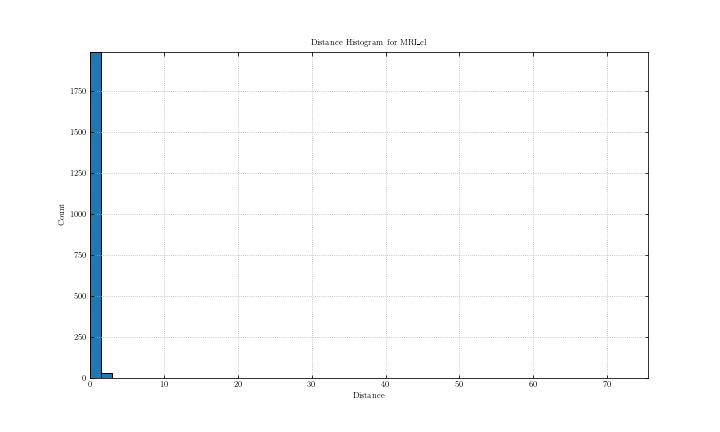

In [5]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# File paths
file_path_cl = '/home/bianyuan/workspace/data/track/Distance_Time_MRI_cl.hdf5'
file_path_grp = '/home/bianyuan/workspace/data/track/Distance_Time_MRI_grp.hdf5'

def plot_distance_histogram(file_path, title):
    with h5py.File(file_path, 'r') as hdf_file:
        distances = []
        galaxy_ids = list(hdf_file.keys())
        for galaxy_id in galaxy_ids:
            distance_data = hdf_file[galaxy_id]['Distance'][:]
            distances.extend(distance_data)  # Collect all distances

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(distances, bins=50, edgecolor='black')
    plt.title(title)
    plt.xlabel('Distance')
    plt.ylabel('Count')
    plt.grid(True)
    plt.savefig('/home/bianyuan/workspace/pic/MRI_Distance_Statistic.pdf')

# Plotting the histograms for MRI_cl and MRI_grp
plot_distance_histogram(file_path_cl, "Distance Histogram for MRI_cl")
# plot_distance_histogram(file_path_grp, "Distance Histogram for MRI_grp")

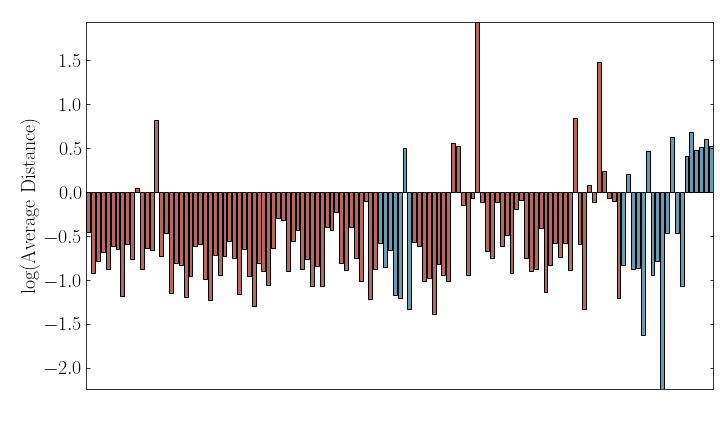

In [44]:
import h5py
import matplotlib.pyplot as plt

# Load HDF5 files
file_path_cl = '/home/bianyuan/workspace/data/track/Distance_Time_MRI_cl.hdf5'
file_path_grp = '/home/bianyuan/workspace/data/track/Distance_Time_MRI_grp.hdf5'
file_path_MRI_cl_rest = '/home/bianyuan/workspace/data/track/MRI_cl_orbit2D.hdf5'
file_path_MRI_grp_rest = '/home/bianyuan/workspace/data/track/MRI_grp_orbit2D.hdf5'

def plot_distance_histogram_grp(file_path, ax):
    with h5py.File(file_path, 'r') as hdf_file:
        for galaxy_id in hdf_file.keys():
            distances = hdf_file[galaxy_id]['Distance'][:]
            ax.bar(galaxy_id, np.log10(np.mean(distances)), color=grp)

def plot_distance_histogram_rest_grp(file_path, ax):
    with h5py.File(file_path, 'r') as hdf_file:
        for galaxy_id in hdf_file.keys():
            distances = hdf_file[galaxy_id]['distance'][:]
            ax.bar(galaxy_id, np.log10(np.mean(distances)), color=grp)

def plot_distance_histogram_cl(file_path, ax):
    with h5py.File(file_path, 'r') as hdf_file:
        for galaxy_id in hdf_file.keys():
            distances = hdf_file[galaxy_id]['Distance'][:]
            ax.bar(galaxy_id, np.log10(np.mean(distances)), color=cl)


def plot_distance_histogram_rest_cl(file_path, ax):
    with h5py.File(file_path, 'r') as hdf_file:
        for galaxy_id in hdf_file.keys():
            distances = hdf_file[galaxy_id]['distance'][:]
            ax.bar(galaxy_id, np.log10(np.mean(distances)), color=cl)

grp = (65/255,130/255,164/255,0.8)
cl = (166/255,64/255,54/255,0.8)

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplots_adjust(left=0.12, bottom=0.10, right=0.99, top=0.95, wspace=0.15, hspace=0.07)

# Plot data from both files
plot_distance_histogram_cl(file_path_cl, ax)
plot_distance_histogram_grp(file_path_grp, ax)
plot_distance_histogram_rest_cl(file_path_MRI_cl_rest, ax)
plot_distance_histogram_rest_grp(file_path_MRI_grp_rest, ax)

# ax.set_xlabel('MRIs',fontsize=20)
ax.set_ylabel('log(Average Distance)',fontsize=20)
# ax.set_title('Average Distance for Galaxies in MRI_cl and MRI_grp')
# ax.legend()

# plt.xticks(rotation=90,fontsize=15)
plt.xticks([])
plt.yticks(fontsize=20)
plt.savefig('/home/bianyuan/workspace/pic/MRI_Distance_Statistic.pdf')

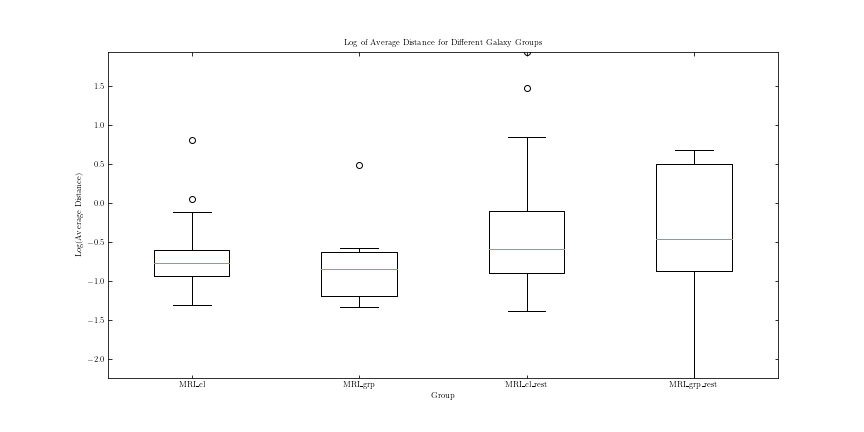

In [15]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

# Function to extract data from HDF5 file and calculate log of average distances
def extract_log_avg_distances(file_path):
    with h5py.File(file_path, 'r') as file:
        log_avg_distances = []
        for galaxy_id in file:
            distances = file[galaxy_id]['Distance'][:]
            avg_distance = np.mean(distances)
            log_avg_distance = np.log10(avg_distance)
            log_avg_distances.append(log_avg_distance)
    return log_avg_distances

def extract_log_avg_distances_rest(file_path):
    with h5py.File(file_path, 'r') as file:
        log_avg_distances = []
        for galaxy_id in file:
            distances = file[galaxy_id]['distance'][:]
            avg_distance = np.mean(distances)
            log_avg_distance = np.log10(avg_distance)
            log_avg_distances.append(log_avg_distance)
    return log_avg_distances

# Extract data from all four files
distances_cl = extract_log_avg_distances('/home/bianyuan/workspace/data/track/Distance_Time_MRI_cl.hdf5')
distances_grp = extract_log_avg_distances('/home/bianyuan/workspace/data/track/Distance_Time_MRI_grp.hdf5')
distances_MRI_cl_rest = extract_log_avg_distances_rest('/home/bianyuan/workspace/data/track/MRI_cl_orbit2D.hdf5')
distances_MRI_grp_rest = extract_log_avg_distances_rest('/home/bianyuan/workspace/data/track/MRI_grp_orbit2D.hdf5')

# Prepare data for boxplot
data = [distances_cl, distances_grp, distances_MRI_cl_rest, distances_MRI_grp_rest]
labels = ['MRI_cl', 'MRI_grp', 'MRI_cl_rest', 'MRI_grp_rest']

# Create boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(data, labels=labels)
plt.xlabel('Group')
plt.ylabel('Log(Average Distance)')
plt.title('Log of Average Distance for Different Galaxy Groups')
plt.savefig('/home/bianyuan/workspace/pic/MRI_Distance_Statistic_Box.pdf')  # Update the path to save the file

In [49]:
fields = ['SnapNum','SubfindID','SubhaloPos','SubhaloIDRaw','SubhaloVel','SubhaloVelDisp','SubhaloMassType','SubhaloHalfmassRadType']
tree = il.sublink.loadTree(basePath,99,414930,fields=fields,onlyMPB=True)
h = 0.6774

# mass = tree['SubhaloMassType'][:, 4] * 1e10 / h
ID = tree['SubfindID']
snap = tree['SnapNum']

for i in range(len(snap)):
    # print(f'snap = {snap[i]}, mass = {mass[i]:.2e}')
    print(f'snap = {snap[i]}, ID = {ID[i]}')

snap = 99, ID = 414930
snap = 98, ID = 412445
snap = 97, ID = 410742
snap = 96, ID = 407373
snap = 95, ID = 405189
snap = 94, ID = 401135
snap = 93, ID = 396548
snap = 92, ID = 393641
snap = 91, ID = 389774
snap = 90, ID = 384931
snap = 89, ID = 376530
snap = 88, ID = 372933
snap = 87, ID = 369067
snap = 86, ID = 397822
snap = 85, ID = 367603
snap = 84, ID = 392393
snap = 83, ID = 383580
snap = 82, ID = 380404
snap = 81, ID = 379715
snap = 80, ID = 372825
snap = 79, ID = 369829
snap = 78, ID = 366331
snap = 77, ID = 370719
snap = 76, ID = 367908
snap = 75, ID = 362723
snap = 74, ID = 358545
snap = 73, ID = 355569
snap = 72, ID = 352058
snap = 71, ID = 350235
snap = 70, ID = 344232
snap = 69, ID = 339120
snap = 68, ID = 334897
snap = 67, ID = 331992
snap = 66, ID = 329005
snap = 65, ID = 326240
snap = 64, ID = 321472
snap = 63, ID = 317289
snap = 62, ID = 312927
snap = 61, ID = 311159
snap = 60, ID = 301612
snap = 59, ID = 297677
snap = 58, ID = 285711
snap = 57, ID = 282855
snap = 56, 

In [56]:
FT(redshift_snapshot(73))

9.557142502477856

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import matplotlib.colors as colors
from scipy import stats
import matplotlib.patches as patches
from matplotlib import patheffects
from scipy.interpolate import interp1d
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

h = 0.6774
hdf5_file_path = '/home/bianyuan/workspace/data/combine_connect_snap/MRI_mergertree_evo_properties.hdf5'

def find_local_min_max(distances):
    local_min, local_max = [], []
    for i in range(1, len(distances) - 1):
        if distances[i] < distances[i - 1] and distances[i] < distances[i + 1]:
            local_min.append(i)
        elif distances[i] > distances[i - 1] and distances[i] > distances[i + 1]:
            local_max.append(i)
    return local_min, local_max

def find_apocenter_pericenter(x, y, z):
    distances = np.sqrt(x**2 + y**2 + z**2)
    local_min, local_max = find_local_min_max(distances)
    pericenter = local_min[0] if local_min else None
    # 找到第二个远心点
    apocenter = local_max[1] if len(local_max) > 1 else None
    return pericenter, apocenter

def smooth_trajectory_3d(x, y, z, num_points=1000):
    # 计算每个点之间的距离
    distance = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2)
    distance = np.insert(distance, 0, 0)
    cumulative_distance = np.cumsum(distance)

    # 创建插值函数
    f_x = interp1d(cumulative_distance, x, kind='cubic')
    f_y = interp1d(cumulative_distance, y, kind='cubic')
    f_z = interp1d(cumulative_distance, z, kind='cubic')

    # 创建等间距点
    new_distances = np.linspace(0, cumulative_distance[-1], num_points)

    # 插值新的x、y和z坐标
    new_x = f_x(new_distances)
    new_y = f_y(new_distances)
    new_z = f_z(new_distances)

    return new_x, new_y, new_z

def plot_orbit_with_gradient(ax, x_traj, y_traj, cmap):
    norm = Normalize(vmin=0, vmax=len(x_traj))
    mappable = ScalarMappable(norm=norm, cmap=cmap)

    for i in range(len(x_traj) - 1):
        ax.plot(x_traj[i:i+2], y_traj[i:i+2], color=mappable.to_rgba(i), linewidth=3)

with h5py.File(hdf5_file_path, 'r') as hdf_file:
    for galaxy_id in hdf_file.keys():
        if galaxy_id == '448833':

            galaxy_group = hdf_file[galaxy_id]

            GroupFirstSub = il.groupcat.loadHalos(basePath, 99, fields=['GroupFirstSub'])
            cen_id = None
            # 遍历 GroupFirstSub，找到 ID 落入的两个相邻数之间
            for i in range(len(GroupFirstSub) - 1):
                if GroupFirstSub[i] <= int(galaxy_id) < GroupFirstSub[i + 1]:
                    print(i)
                    cen_id = GroupFirstSub[i]
                    break

            subhalo_0 = il.groupcat.loadSingle(basePath, 99, subhaloID=cen_id)
            sub_pos_0 = subhalo_0['SubhaloPos']
            sub_Re_0 = subhalo_0['SubhaloHalfmassRadType'][4]
            star = il.snapshot.loadSubhalo(basePath, 99, cen_id, 'star', fields=['SubfindDensity','Coordinates','Masses','GFM_StellarPhotometrics'])
            stellar_mass = np.sum(star['Masses']) * 1e10 / h
            g = star['GFM_StellarPhotometrics'][4]
            i = star['GFM_StellarPhotometrics'][6]

            numbers = np.array(galaxy_group['Number'])

            # x_traj = galaxy_group['x'][:]
            # y_traj = galaxy_group['y'][:]
            # z_traj = galaxy_group['z'][:]
            # vx_traj = galaxy_group['vx'][:]
            # vy_traj = galaxy_group['vy'][:]
            # vz_traj = galaxy_group['vz'][:]
            # 过滤距离为0的点
            x_traj = galaxy_group['x'][:][::-1]
            y_traj = galaxy_group['y'][:][::-1]
            z_traj = galaxy_group['z'][:][::-1]
            vx_traj = galaxy_group['vx'][:][::-1]
            vy_traj = galaxy_group['vy'][:][::-1]
            vz_traj = galaxy_group['vz'][:][::-1]
            snaps = galaxy_group['Snap'][:][::-1]

            distances = np.sqrt(x_traj**2 + y_traj**2 + z_traj**2)
            filter_mask = (distances > 0) & (numbers > 150)

            x_traj = x_traj[filter_mask]
            y_traj = y_traj[filter_mask]
            z_traj = z_traj[filter_mask]
            vx_traj = vx_traj[filter_mask]
            vy_traj = vy_traj[filter_mask]
            vz_traj = vz_traj[filter_mask]
            snaps = snaps[filter_mask]

            # 找到近心点和远心点
            # pericenter, apocenter = find_apocenter_pericenter(x_traj, y_traj, z_traj)
            # 找到近心点和第二个远心点
            pericenter, second_apocenter = find_apocenter_pericenter(x_traj, y_traj, z_traj)

            x_min, x_max = x_traj.min(), x_traj.max()
            y_min, y_max = y_traj.min(), y_traj.max()
            max_absolute_value = max(abs(x_min), abs(x_max), abs(y_min), abs(y_max))
            rmax = max_absolute_value + 30
            # rmax = 100
            bins = 800

            print(rmax)

            nPixels = [bins,bins]

            x = star['Coordinates'][:, 0] - sub_pos_0[0]
            y = star['Coordinates'][:, 1] - sub_pos_0[1]
            z = star['Coordinates'][:, 2] - sub_pos_0[2]
            rho = (star['Masses'] * 1e10 / h)/((rmax*rmax)/(bins*bins))

            # Plotting the projection
            # plt.style.use('dark_background')
            fig, ax = plt.subplots(figsize=(8, 8))
            plt.subplots_adjust(left=0.01, bottom=0.01, right=0.99, top=0.99)

            ax.set_facecolor('black')

            for spine in ax.spines.values():
                spine.set_edgecolor('white')

            # img = ax.imshow(hist_xy.T, extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], 
            #                 origin='lower', cmap=plt.cm.rainbow, norm=colors.LogNorm())
            grid, _, _, _ = stats.binned_statistic_2d(x, y, rho, 'sum', bins=nPixels, range=([-rmax,rmax],[-rmax,rmax]))

            im = ax.imshow(np.log10(grid.T/((2*rmax*2*rmax)/(bins*bins))),extent=[-rmax,rmax,-rmax,rmax],cmap='bone',interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())

            # if apocenter < pericenter:
            #     apocenter, pericenter = pericenter, apocenter  # 交换值，确保顺序正确

            # 重新计算远心点
            local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
            apocenters = local_max  # 更新远心点索引列表

            third_apocenter = local_max[2]
                
            # 平滑轨迹
            smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

            # 计算平滑轨迹的累计距离
            smooth_distances = np.sqrt(np.diff(smooth_x)**2 + np.diff(smooth_y)**2)
            smooth_distances = np.insert(smooth_distances, 0, 0)
            smooth_cumulative_distance = np.cumsum(smooth_distances)

            # 计算原始轨迹的累计距离
            original_distances = np.sqrt(np.diff(x_traj)**2 + np.diff(y_traj)**2)
            original_distances = np.insert(original_distances, 0, 0)
            original_cumulative_distance = np.cumsum(original_distances)

            # 将原始轨迹的远心点索引映射到平滑轨迹上
            smooth_apocenters = []
            for index in apocenters:
                # 找到最接近原始远心点累计距离的平滑轨迹点
                closest_index = np.argmin(np.abs(smooth_cumulative_distance - original_cumulative_distance[index]))
                smooth_apocenters.append(closest_index)

            second_apocenter_smooth = smooth_apocenters[0]

            # # 着重从起点到第二个远心点的部分
            # ax.plot(smooth_x[:second_apocenter_smooth + 1], smooth_y[:second_apocenter_smooth + 1], color='white', linewidth=3)

            # # 其余部分用灰线表示
            # ax.plot(smooth_x[second_apocenter_smooth:], smooth_y[second_apocenter_smooth:], color='lightgrey', alpha=0.4, linestyle='--', linewidth=3)


            smooth_x, smooth_y, _ = smooth_trajectory_3d(x_traj, y_traj, z_traj)

            # 使用平滑的轨迹绘制（只用X和Y坐标）
            plot_orbit_with_gradient(ax, smooth_x, smooth_y, cmap='gray_r')


            # specific_snaps = [99, 96, 90, 85, 79, 73, 70, 68, 66, 65, 64, 63]
            specific_snaps = [64, 62, 61, 60, 59]
            # specific_snaps = [99, 95, 92, 87, 84, 61, 60, 59]

            for j, snap in enumerate(snaps):
                if round(snap, 2) in specific_snaps:
                    ax.plot(x_traj[j], y_traj[j], 'o', color='white', markeredgecolor='black', zorder=2)
                    text = ax.text(x_traj[j], y_traj[j], "{:.2f} Gyr".format(FT(redshift_snapshot(snap))), fontsize=10, color='black', zorder=3)
                    text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

            # # 标注时间
            # for i, snap in enumerate(snaps[:third_apocenter + 1]):
            #     ax.plot(x_traj[i], y_traj[i], 'o', color='white', markeredgecolor='black', zorder=2)  # 设置zorder为较高的值
                
            #     # 添加文本标签并设置轮廓线
            #     text = ax.text(x_traj[i], y_traj[i], "{:.2f} Gyr".format(snap), fontsize=10, color='black', zorder=3)
            #     text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='white')])

            # # 重新计算远心点
            # local_min, local_max = find_local_min_max(distances[filter_mask])  # 重新计算远心点和近心点
            # apocenters = local_max  # 更新远心点索引列表

            # # 在远心点处标注时间
            # for apocenter_index in apocenters:
            #     snap = snaps[apocenter_index]
            #     ax.plot(x_traj[apocenter_index], y_traj[apocenter_index], 'o', color='white', markeredgecolor='black', zorder=2)
            #     text = ax.text(x_traj[apocenter_index], y_traj[apocenter_index], "{:.2f} Gyr".format(snap), fontsize=10, color='black', zorder=3)
            #     text.set_path_effects([patheffects.withStroke(linewidth=1.5, foreground='white')])

            closest_distance = np.min(np.sqrt((x_traj) ** 2 + (y_traj) ** 2 + (z_traj) ** 2))

            # 计算质量的科学计数法表示

            stellar_mass_sci = "{:.2e}".format(np.sum(star['Masses']) * 1e10 / h)
            # # text = ax.text(-2900/3000 * rmax, 1800/3000 * rmax, "$M^{{\\mathrm{{Sat}}}}_{{\\mathrm{{ColdGas}}}} = {:.2e} {}$\n$d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}} = {:.2f} R_{{\\mathrm{{vir}}}}, {:.0f}$ kpc".format(cold_gas_mass, M_sun, Distance_normalized, Distance), color='white', fontsize=23)
            text_str = r"$\mathrm{ID}^{{\mathrm{sat}}} = " + str(galaxy_id) + r", \mathrm{ID}^{{\mathrm{host}}} = " + str(cen_id) + "$\n" + r"$M^{{\mathrm{host}}}_{{*}} = " + stellar_mass_sci + r" \, M_{\odot}$" + "\n" + "$min(d^{{\\mathrm{{host}}}}_{{\\mathrm{{sat}}}}) = $" + "{:.2f} kpc".format(closest_distance)
            bbox_props = dict(boxstyle='round,pad=0.1', facecolor='gray', edgecolor='none', alpha=0.8)
            ax.text(250 / 3000 * rmax, 2250 / 3000 * rmax, text_str, fontsize=20, color='white', bbox=bbox_props)
            # text = ax.text(600 / 3000 * rmax, 2150 / 3000 * rmax, text_str, fontsize=20, color='black')
            # text.set_path_effects([patheffects.withStroke(linewidth=1, foreground='white')])

            # 计算比例尺的长度和位置
            scale_length = int(rmax / 3)  # 比例尺的长度，例如10 kpc
            pixel_length = scale_length / (2 * rmax) * bins  # 将物理长度转换为像素长度

            # 设置比例尺的位置
            scale_x_end = rmax - 0.05 * 2 * rmax  # 比例尺的结束位置，距离右边界一定距离
            scale_x_start = scale_x_end - pixel_length  # 比例尺的起始位置
            scale_y_position = -rmax + 0.05 * 2 * rmax  # 比例尺的垂直位置，距离下边界一定距离

            # 添加比例尺
            ax.hlines(scale_y_position, scale_x_start, scale_x_end, color='white', lw=4)

            # 添加比例尺文本
            scale_text = ax.text(scale_x_start + pixel_length / 2, scale_y_position + 0.025 * 2 * rmax, f'{scale_length} kpc', color='white', fontsize=15, ha='center', va='center')
            # scale_text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])


            # Add white edge to the scale text
            # scale_text.set_path_effects([patheffects.withStroke(linewidth=2, foreground='white')])

            # Create a color bar
            # cbar = fig.colorbar(im, pad=0)
            # cbar.set_label('Density ($M_\\odot/kpc^{2}$)', fontsize=20)
            # cbar.ax.tick_params(labelsize=18)

            # ax.tick_params(axis='x', which='both', labelsize=20)
            # ax.tick_params(axis='y', which='both', labelsize=20)
            # # Set labels and title
            # ax.set_xlabel('X (kpc)', fontsize=20)
            # ax.set_ylabel('Y (kpc)', fontsize=20)

            # ax.set_xlim(-100,100)
            # ax.set_ylim(-100,100)

            ax.set_xticklabels([])
            ax.set_xticks([])
            ax.set_yticklabels([])
            ax.set_yticks([])

            # Save the plot
            plt.savefig('/home/bianyuan/workspace/pic/3Dtrack/2Dtrack/2D_Projection_XY_'+str(galaxy_id)+'.pdf')
            plt.close(fig)

# xyz5l

84
217.55362876439327


/tmp/ipykernel_25945/1338988838.py:146: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(grid.T/((2*rmax*2*rmax)/(bins*bins))),extent=[-rmax,rmax,-rmax,rmax],cmap='bone',interpolation='nearest', aspect = nPixels[1]/nPixels[0], origin = 'lower', norm=colors.LogNorm())
